<div align="center"> 

---

# **Behavioral metrics**

</div>


---

<div align="center"> 

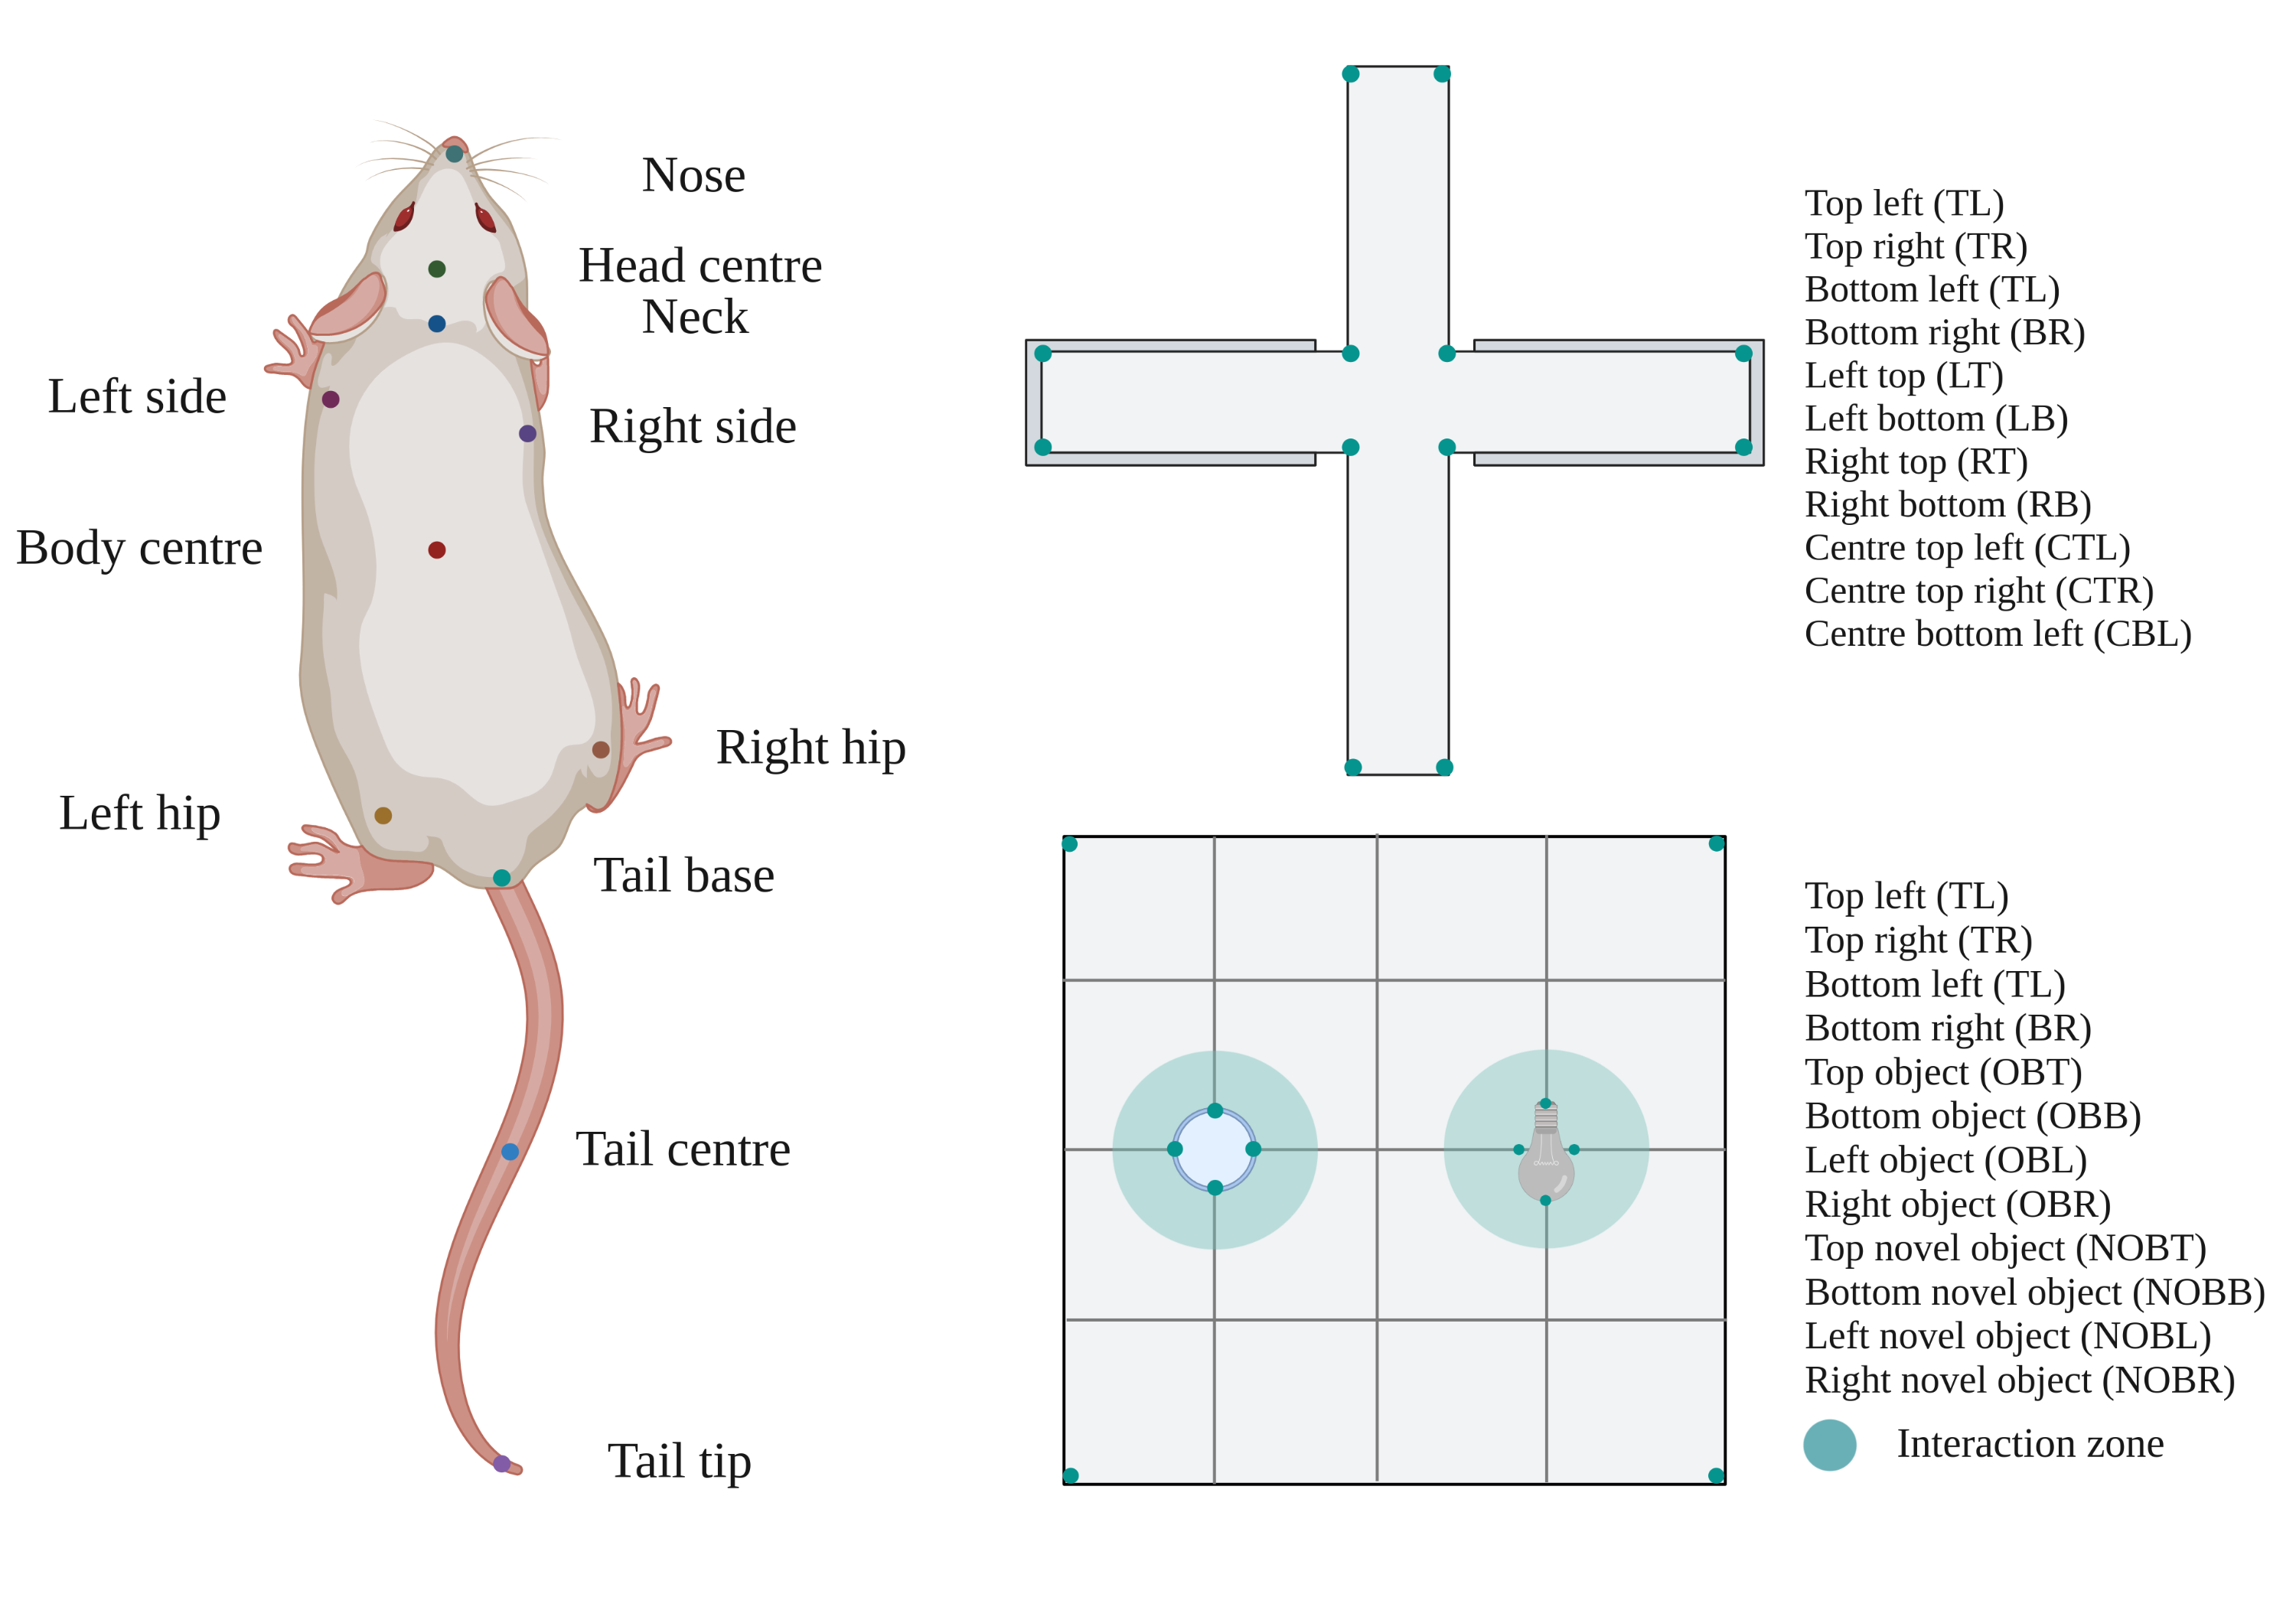

</div>

---
# <u> **Description:**</u>

Behavioral

---

## **Workflow**

0. Deeplabcut code
1. General preparation
2. Data preparation
3. Analysis
4. Exploratory data analysis
5. Visualization
6. Export data

---

**Variables to consider:** 
  - Session
  - Sex  
  
**Tasks:**
  - Elevated plus maze
  - Novel object recognition
  
**Analysis:**
  - 
  - 

---

### **General settings options**

In [1]:
addTaskCallback(function(...) {set.seed(42);TRUE})
options(warn=-1) # to turn off warnings
#options(warn=0) # to turn on warnings
options(repr.plot.width=14, repr.plot.height=10) # to resize plots

2 
2

In [2]:
setwd("../")
load("Data/Alcohol_consumption.RData")

In [3]:
load("Data/Behavior_metricsEPM.RData")

In [4]:
load("Data/Behavior_metricsNOR.RData")

In [5]:
load("Data/Behavior_metricsCPP.RData")

## **0. Deeplabcut code**

The raw and labelled videos can be found in:


We trained a neural network for each behavioral task, the code for running it into a HCP cluster and the options for it are:
  
[bash script](https://github.com/psilantrolab/Sudmex-alcohol-rat/blob/main/code/DLC/run_dlc.sh)   
[dlc commands](https://github.com/psilantrolab/Sudmex-alcohol-rat/blob/main/code/DLC/dlc_commands.py)

We created a neural network using the following bodyparts/maze labels:
- tl = top left
- tr = top right
- bl = bottom left
- br = bottom right
- obt = object top
- obb = object bottom
- obl = object left
- obr = object right
- nobt = novel object top
- nobb = novel object bottom
- nobl = novel object left
- nobr = novel object right
- nose
- headcentre
- neck
- bodycentre
- bcl = bodycentre left
- bcr = bodycentre right
- hipl = left hip
- hipr = right hip
- tailbase
- tailcentre
- tailtip

Config files to train the networks:
[Config EPM](https://github.com/psilantrolab/Sudmex-alcohol-rat/blob/main/code/DLC/config_EPM.yaml)   
[Config NOR](https://github.com/psilantrolab/Sudmex-alcohol-rat/blob/main/code/DLC/config_NOR.yaml) 

1. Once we trained the net, we tested for automatic tracking of each rat on each behavioral task
2. We exported the tracking to csv files
3. Using DLCAnalyzer we extracted the metrics of interest (https://www.nature.com/articles/s41386-020-0776-y)
    - EPM: Using the scripts (https://github.com/ETHZ-INS/DLCAnalyzer)
    - NOR: a modified script of DLC [script](https://github.com/psilantrolab/Sudmex-alcohol-rat/blob/main/code/DLC/DLCAnalyzer_NOR.R)

## **1. General preparation**

### **1.1 Load  R packages and dependencies.** 

  The following packages are needed for the to move on, firstly it is needed to download pacman library

 ---

In [3]:
# Make sure to install pacman before we begin
  if (!require("pacman")) {
  install.packages("pacman")
  }

# Load required packages  
  pacman::p_load(tidyverse,readxl,Matrix,lme4,devtools,ggpubr,rstatix,ggdist,sp,imputeTS,ggmap,data.table,cowplot,corrplot,keras,magrittr,gghalves,skimr,emmeans,multcomp,easystats)


Loading required package: pacman



In [4]:
# Run DLCAnalyzer scripts
source("code/DLC/DLCAnalyzer_NOR.R")

In [5]:
pal_batch <- c("#264653","#2a9d8f","#5e548e","#ff595e","#03045e")

### **1.1 Files**

For EPM, the files are: 

- EPM: T1 and T2: {Batch}_EPM_{RID}_{Time}DLC_resnet50_EPMMar18shuffle1_{train_cycle}

For NOR, the files are:
- NOR: T1 and T2: {Batch}_{RID}_{Phase}DLC_resnet50_ORApr27shuffle1_{train_cycle}

---

---

# **Elevated plus maze**

---

## **2. Data preparation**

Reading files and set it all up.

Firstly, run the functions made by Sturman et al, (2020) and the modified function for NOR, the script is in:

[script](https://github.com/psilantrolab/Sudmex-alcohol-rat/blob/main/code/DLCAnalyzer_NOR.R)

Secondly, create the function to read, calibrating and analysis of the tracking accordingly with each batch recording (camera parameters)

Frames per second (fps):
- Batch 1: 7.5 and 22.5
- Batch 2: 7.5
- Batch 3: 30
- Batch 4: 15
- Batch 5: 15

#### Important: 

The bodycenter is the point-label to consider if the rat is in which arm

In [6]:
Class_group <- read_csv("Data/Class.csv")

Rows: 63 Columns: 3
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (3): RID, class, Sex

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [7]:
T1_input_folder <- paste0(getwd(),"/Data/Behavior/EPM_min/T1/")
T2_input_folder <- paste0(getwd(),"/Data/Behavior/EPM_min/T2/")
RID_group <- read_csv("Data/RID.csv")

DLCmetrics_selection <- c('file','bodycentre.distance.moving', 'bodycentre.speed.moving', 'bodycentre.time.moving', 'bodycentre.total.time', 
'bodycentre.time.stationary', 'bodycentre.center.distance.moving', 'bodycentre.center.speed.moving',
'bodycentre.center.time.moving', 'bodycentre.center.total.time', 'bodycentre.center.time.stationary',
'bodycentre.center.transitions', 'bodycentre.open.distance.moving', 'bodycentre.open.speed.moving',
'bodycentre.open.time.moving', 'bodycentre.open.total.time', 'bodycentre.open.time.stationary',
'bodycentre.open.transitions', 'bodycentre.closed.distance.moving', 'bodycentre.closed.speed.moving',
'bodycentre.closed.time.moving', 'bodycentre.closed.total.time', 'bodycentre.closed.time.stationary',
'bodycentre.closed.transitions')

Rows: 135 Columns: 4
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (4): RID, Group, Batch, Sex

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [8]:
RID_group %>% left_join(Class_group[-3], by ="RID") %>% mutate(class = case_when(class == "Low" ~ class, class == "High" ~ class,TRUE ~ "Ctrl")) %>% 
write_csv("Data/RID_Group_class.csv")

### **2.1 Create functions accordingly with each batch**

#### **2.1.1 Cut the duration of the videos**

In [9]:
# Create function ---------------------------------------------------------

pipeline_1 <- function(path){
  Tracking <- ReadDLCDataFromCSV(file = path, fps = 22.5)
  Tracking <- CutTrackingData(Tracking,start = 100, end = 250)
  Tracking <- CalibrateTrackingData(Tracking, method = "distance",in.metric = 65.5, points = c("tl","br"))
  zoneinfo <- read.table(paste0(getwd(),"/code/DLC/EPM_zoneinfo.csv"), sep = ",", header = T)
  Tracking <- AddZones(Tracking,zoneinfo)
  Tracking <- CleanTrackingData(Tracking, likelihoodcutoff = 0.95,existence.pol = ScalePolygon(Tracking$zones$arena, 1.8))
  Tracking <- EPMAnalysis(Tracking, movement_cutoff = 5,integration_period = 5,points = "bodycentre", nosedips = TRUE)
  return(Tracking)
}

pipeline_2 <- function(path){
  Tracking <- ReadDLCDataFromCSV(file = path, fps = 7.5)
  Tracking <- CutTrackingData(Tracking,start = 100, end = 250)
  Tracking <- CalibrateTrackingData(Tracking, method = "distance",in.metric = 65.5, points = c("tl","br"))
  zoneinfo <- read.table(paste0(getwd(),"/code/DLC/EPM_zoneinfo.csv"), sep = ",", header = T)
  Tracking <- AddZones(Tracking,zoneinfo)
  Tracking <- CleanTrackingData(Tracking, likelihoodcutoff = 0.95,existence.pol = ScalePolygon(Tracking$zones$arena, 1.8))
  Tracking <- EPMAnalysis(Tracking, movement_cutoff = 5,integration_period = 5,points = "bodycentre", nosedips = TRUE)
  return(Tracking)
}

pipeline_3 <- function(path){
  Tracking <- ReadDLCDataFromCSV(file = path, fps = 30)
  Tracking <- CutTrackingData(Tracking,start = 100, end = 250)
  Tracking <- CalibrateTrackingData(Tracking, method = "distance",in.metric = 65.5, points = c("tl","br"))
  zoneinfo <- read.table(paste0(getwd(),"/code/DLC/EPM_zoneinfo.csv"), sep = ",", header = T)
  Tracking <- AddZones(Tracking,zoneinfo)
  Tracking <- CleanTrackingData(Tracking, likelihoodcutoff = 0.95,existence.pol = ScalePolygon(Tracking$zones$arena, 1.8))
  Tracking <- EPMAnalysis(Tracking, movement_cutoff = 5,integration_period = 5,points = "bodycentre", nosedips = TRUE)
  return(Tracking)
}

pipeline_45 <- function(path){
  Tracking <- ReadDLCDataFromCSV(file = path, fps = 15)
  Tracking <- CutTrackingData(Tracking,start = 100, end = 250)
  Tracking <- CalibrateTrackingData(Tracking, method = "distance",in.metric = 65.5, points = c("tl","br"))
  zoneinfo <- read.table(paste0(getwd(),"/code/DLC/EPM_zoneinfo.csv"), sep = ",", header = T)
  Tracking <- AddZones(Tracking,zoneinfo)
  Tracking <- CleanTrackingData(Tracking, likelihoodcutoff = 0.95,existence.pol = ScalePolygon(Tracking$zones$arena, 1.8))
  Tracking <- EPMAnalysis(Tracking, movement_cutoff = 5,integration_period = 5,points = "bodycentre", nosedips = TRUE)
  return(Tracking)
}

### **2.2 Analyze tracking with DLC analyzer**

In [ ]:
# Batch 1

### T1 ###
# No recorded

### T2 ###

B1_files_T2 <- list.files(T2_input_folder, pattern = "G1", recursive = T)[-c(7,12)]

B1_TrackingAll_T2 <- RunPipeline(B1_files_T2,T2_input_folder,FUN = pipeline_2)
B15_Report_T2 <- MultiFileReport(B1_TrackingAll_T2) %>% dplyr::select(all_of(DLCmetrics_selection))


# Batch 1.1

### T2 ###
B17_files_T2 <- list.files(T2_input_folder, pattern = "G1_EPM_07") 
B17_TrackingAll_T2 <- RunPipeline(B17_files_T2,T2_input_folder,FUN = pipeline_1)
B17_Report_T2 <- MultiFileReport(B17_TrackingAll_T2) %>% dplyr::select(all_of(DLCmetrics_selection))

B114_files_T2 <- list.files(T2_input_folder, pattern = "G1_EPM_14") 
B114_TrackingAll_T2 <- RunPipeline(B114_files_T2,T2_input_folder,FUN = pipeline_1)
B114_Report_T2 <- MultiFileReport(B114_TrackingAll_T2) %>% dplyr::select(all_of(DLCmetrics_selection))

B1_Report_T2 <- rbind.data.frame(B15_Report_T2,B17_Report_T2,B114_Report_T2)

In [ ]:
# Batch 2

### T1 ###

B2_files_T1 <- list.files(T1_input_folder, pattern = "G2", recursive = T)

B2_TrackingAll_T1 <- RunPipeline(B2_files_T1,T1_input_folder,FUN = pipeline_2)
B2_Report_T1 <- MultiFileReport(B2_TrackingAll_T1) %>% dplyr::select(all_of(DLCmetrics_selection))

### T2 ###

B2_files_T2 <- list.files(T2_input_folder, pattern = "G2", recursive = T)

B2_TrackingAll_T2 <- RunPipeline(B2_files_T2,T2_input_folder,FUN = pipeline_2)
B2_Report_T2 <- MultiFileReport(B2_TrackingAll_T2) %>% dplyr::select(all_of(DLCmetrics_selection))
    

In [ ]:
# Batch 3

### T1 ###

B3_files_T1 <- list.files(T1_input_folder, pattern = "G3", recursive = T)

B3_TrackingAll_T1 <- RunPipeline(B3_files_T1,T1_input_folder,FUN = pipeline_3)
B3_Report_T1 <- MultiFileReport(B3_TrackingAll_T1) %>% dplyr::select(all_of(DLCmetrics_selection))

### T2 ###

B3_files_T2 <- list.files(T2_input_folder, pattern = "G3", recursive = T)

B3_TrackingAll_T2 <- RunPipeline(B3_files_T2,T2_input_folder,FUN = pipeline_3)
B3_Report_T2 <- MultiFileReport(B3_TrackingAll_T2) %>% dplyr::select(all_of(DLCmetrics_selection))
    

In [ ]:
# Batch 4 and 5

### T1 ###

B45_files_T1 <- list.files(T1_input_folder, pattern = "G[4,5,6]", recursive = T)

B45_TrackingAll_T1 <- RunPipeline(B45_files_T1,T1_input_folder,FUN = pipeline_45)
B45_Report_T1 <- MultiFileReport(B45_TrackingAll_T1) %>% dplyr::select(all_of(DLCmetrics_selection))

### T2 ###

B45_files_T2 <- list.files(T2_input_folder, pattern = "G[4,5,6]", recursive = T)

B45_TrackingAll_T2 <- RunPipeline(B45_files_T2,T2_input_folder,FUN = pipeline_45)
B45_Report_T2 <- MultiFileReport(B45_TrackingAll_T2) %>% dplyr::select(all_of(DLCmetrics_selection))
    

### **2.3 Binding and arranging**

In [ ]:
Report_T1 <- rbind.data.frame(B2_Report_T1,B3_Report_T1,B45_Report_T1) 
Report_T1 <- Report_T1 %>% 
             add_column(RID = if_else(as.numeric(str_split(Report_T1$file,n = 4, pattern = "_") %>% 
                                     map_chr(~ .x %>% extract(3))) <= 100,
                                         paste0("sub-0",str_split(Report_T1$file,n = 4, pattern = "_") %>% 
                                     map_chr(~ .x %>% extract(3))),
                                         paste0("sub-",str_split(Report_T1$file,n = 4, pattern = "_") %>% 
                                     map_chr(~ .x %>% extract(3)))),.before = 1) %>% 
             left_join(RID_group, by = "RID") %>% add_column(Stage = rep("T1",length(Report_T1$file)) )

Report_T2 <- rbind.data.frame(B1_Report_T2,B2_Report_T2,B3_Report_T2,B45_Report_T2) 
Report_T2 <- Report_T2 %>% 
             add_column(RID = if_else(as.numeric(str_split(Report_T2$file,n = 4, pattern = "_") %>% 
                                     map_chr(~ .x %>% extract(3))) <= 100,
                                         paste0("sub-0",str_split(Report_T2$file,n = 4, pattern = "_") %>% 
                                     map_chr(~ .x %>% extract(3))),
                                         paste0("sub-",str_split(Report_T2$file,n = 4, pattern = "_") %>% 
                                     map_chr(~ .x %>% extract(3)))),.before = 1) %>% 
             left_join(RID_group, by = "RID") %>% add_column(Stage = rep("T2",length(Report_T2$file)) )

Report_DLC <- rbind.data.frame(Report_T1,Report_T2) %>% full_join(read_csv("Data/Behavior/EPM/T1/LEC_B1.csv"),
                         by = c("RID","Group","Batch","Sex","Stage","bodycentre.center.total.time","bodycentre.open.total.time",
                                "bodycentre.closed.total.time"))

## **3. Analysis**

### **3.1 Time in each arms**

In [15]:
EPM_timeArms <- Report_DLC %>% dplyr::select(RID,Group,Batch,Sex,Stage,bodycentre.open.total.time, bodycentre.closed.total.time) %>%
                pivot_longer(cols = c(bodycentre.open.total.time, bodycentre.closed.total.time), 
                             names_to = "Arm", values_to = "Time") %>%
                filter(Group == "Alc" | Group == "Ctrl") %>% ## Filtering by groups of interest  
                mutate(Group = factor(Group, levels = c("Ctrl", "Alc")),
                RID = factor(RID),
                Stage = factor(Stage),
                Arm = factor(Arm),
                Sex = factor(Sex),
                Arm = case_when(Arm == "bodycentre.open.total.time" ~ "Open",
                                Arm == "bodycentre.closed.total.time" ~ "Closed")) %>% 
                pivot_wider(names_from = Arm, values_from = Time) %>% 
                mutate(resta = (Closed-Open),
                       suma = (Open+Closed),
                       PI = if_else(is.nan(Closed/suma),0,(Closed/suma))) %>% na.omit() 

### **3.2 Entries in each arms**

In [16]:
EPM_entries <- Report_DLC %>% dplyr::select(RID,Group,Batch,Sex,Stage,bodycentre.open.transitions, bodycentre.closed.transitions) %>%
                pivot_longer(cols = c(bodycentre.open.transitions, bodycentre.closed.transitions), 
                             names_to = "Arm_entries", values_to = "Entries") %>%
                filter(Group == "Alc" | Group == "Ctrl") %>% ## Filtering by groups of interest  
                mutate(Group = factor(Group, levels = c("Ctrl", "Alc")),
                RID = factor(RID),
                Stage = factor(Stage),
                Arm_entries = factor(Arm_entries),
                Sex = factor(Sex),
                Arm_entries = case_when(Arm_entries == "bodycentre.open.transitions" ~ "Open_entries",
                                        Arm_entries == "bodycentre.closed.transitions" ~ "Closed_entries")) %>% 
                pivot_wider(names_from = Arm_entries, values_from = Entries) %>% 
                mutate(resta_entries = (Closed_entries-Open_entries),
                       suma_entries = (Open_entries+Closed_entries),
                       PI_entries = if_else(is.nan(Closed_entries/suma_entries),0,(Closed_entries/suma_entries))) %>% 
                na.omit() 

### **3.3 Anxiety index**

Anxiety Index = 1 − ([Open arm time/Test duration] + [Open arms entries/Total number of entries]/2)

In [ ]:
EPM_AI <- left_join(EPM_timeArms,EPM_entries) %>% 
          mutate(Anxiety_index = ( 1- ((PI) + (PI_entries)) / 2 ) ) %>% 
          left_join(Class_group) %>% 
          convert_as_factor(Sex,Group)

In [18]:
EPM_AI$class <- EPM_AI$class %>% replace_na('Ctrl')

## **4. Exploratory data analysis**

In [19]:
EPM_AI %>% skimr::skim()

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,factor.ordered,factor.n_unique,factor.top_counts,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,numeric.hist
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<lgl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,character,RID,0,1.0000000,7,7,0,54,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,character,Batch,0,1.0000000,2,2,0,6,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,character,class,0,1.0000000,3,4,0,3,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,factor,Group,0,1.0000000,NA,NA,NA,NA,NA,FALSE,2,"Alc: 67, Ctr: 38",NA,NA,NA,NA,NA,NA,NA,NA
5,factor,Sex,0,1.0000000,NA,NA,NA,NA,NA,FALSE,2,"fem: 53, mal: 52",NA,NA,NA,NA,NA,NA,NA,NA
6,factor,Stage,0,1.0000000,NA,NA,NA,NA,NA,FALSE,2,"T2: 54, T1: 51",NA,NA,NA,NA,NA,NA,NA,NA
7,numeric,Open,0,1.0000000,NA,NA,NA,NA,NA,NA,NA,NA,27.6495026,39.3257586,0.0000,5.8666667,16.2666667,25.6000000,151.4667,▇▁▁▁▁
8,numeric,Closed,0,1.0000000,NA,NA,NA,NA,NA,NA,NA,NA,24.4876614,37.0470685,0.0000,4.4000000,12.2000000,27.2333333,186.6700,▇▁▁▁▁
9,numeric,resta,0,1.0000000,NA,NA,NA,NA,NA,NA,NA,NA,-3.1618413,42.2625554,-151.4667,-13.1333333,-2.4666667,14.1333333,152.1000,▁▁▇▁▁


── Data Summary ────────────────────────
                           Values    
Name                       Piped data
Number of rows             105       
Number of columns          17        
_______________________              
Column type frequency:               
  character                3         
  factor                   3         
  numeric                  11        
________________________             
Group variables            None      

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 RID                   0             1   7   7     0       54          0
2 Batch                 0             1   2   2     0        6          0
3 class                 0             1   3   4     0        3          0

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique top_counts      
1 Group

### **4.1 Stats (hyphotesis testing)**

In [24]:
EPM.shapiro <-EPM_AI %>% 
    shapiro_test(Anxiety_index)
EPM.shapiro

variable,statistic,p
<chr>,<dbl>,<dbl>
Anxiety_index,0.9244934,3.846603e-05


In [22]:
EPM.levene <-EPM_AI %>% 
    levene_test(Anxiety_index~Group)
EPM.levene

df1,df2,statistic,p
<int>,<int>,<dbl>,<dbl>
1,93,0.4026468,0.5272834


In [23]:
EPM.aov <- anova_test(data = EPM_AI, dv = Anxiety_index, wid = RID,
                               between = c(Group,Sex), within = Stage)
EPM.aov

,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,Group,1,37,0.098,0.756,,0.000944
2,Sex,1,37,7.480,0.010,*,0.067000
3,Stage,1,37,0.369,0.547,,0.006000
4,Group:Sex,1,37,0.394,0.534,,0.004000
5,Group:Stage,1,37,0.653,0.424,,0.011000
6,Sex:Stage,1,37,0.133,0.717,,0.002000
7,Group:Sex:Stage,1,37,0.161,0.690,,0.003000


In [25]:
EPM.kw <- EPM_AI %>%
    group_by(Sex,Stage) %>%
    anova_test(Anxiety_index ~ Group)
EPM.kw

,Sex,Stage,Effect,DFn,DFd,F,p,p<.05,ges
,<fct>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,female,T1,Group,1,18,0.301,0.590,,0.016000
2,female,T2,Group,1,25,0.315,0.580,,0.012000
3,male,T1,Group,1,19,0.489,0.493,,0.025000
4,male,T2,Group,1,25,0.005,0.945,,0.000193


In [26]:
EPM.t <- EPM_AI %>%
  group_by(Stage) %>%
  pairwise_t_test(
    Anxiety_index ~ Group, paired = FALSE, 
    p.adjust.method = "fdr")
EPM.t

,Stage,.y.,group1,group2,n1,n2,p,p.signif,p.adj,p.adj.signif
,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>
1,T1,Anxiety_index,Ctrl,Alc,18,33,0.411,ns,0.411,ns
2,T2,Anxiety_index,Ctrl,Alc,20,34,0.698,ns,0.698,ns


In [27]:
EPM.tsex <- EPM_AI %>%
  group_by(Stage,Group) %>%
  pairwise_t_test(
    Anxiety_index ~ Sex, paired = FALSE, 
    p.adjust.method = "fdr")
EPM.tsex

,Group,Stage,.y.,group1,group2,n1,n2,p,p.signif,p.adj,p.adj.signif
,<fct>,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>
1,Ctrl,T1,Anxiety_index,female,male,9,9,0.394,ns,0.394,ns
2,Alc,T1,Anxiety_index,female,male,17,16,0.245,ns,0.245,ns
3,Ctrl,T2,Anxiety_index,female,male,10,10,0.208,ns,0.208,ns
4,Alc,T2,Anxiety_index,female,male,17,17,0.010,**,0.010,**


In [31]:
EPM.t_sex <- EPM_AI %>%
  group_by(Stage,Sex) %>%
  pairwise_t_test(
    Anxiety_index ~ Group, paired = FALSE, 
    p.adjust.method = "fdr")
EPM.t_sex

,Sex,Stage,.y.,group1,group2,n1,n2,p,p.signif,p.adj,p.adj.signif
,<fct>,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>
1,female,T1,Anxiety_index,Ctrl,Alc,9,17,0.590,ns,0.590,ns
2,male,T1,Anxiety_index,Ctrl,Alc,9,16,0.493,ns,0.493,ns
3,female,T2,Anxiety_index,Ctrl,Alc,10,17,0.580,ns,0.580,ns
4,male,T2,Anxiety_index,Ctrl,Alc,10,17,0.945,ns,0.945,ns


In [32]:
EPM.t_ssex <- EPM_AI %>%
  group_by(Stage) %>%
  pairwise_t_test(
    Anxiety_index ~ Sex, paired = FALSE, 
    p.adjust.method = "fdr")
EPM.t_ssex

,Stage,.y.,group1,group2,n1,n2,p,p.signif,p.adj,p.adj.signif
,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>
1,T1,Anxiety_index,female,male,26,25,0.14800,ns,0.14800,ns
2,T2,Anxiety_index,female,male,27,27,0.00507,**,0.00507,**


In [33]:
EPM.aov_class <- anova_test(data = EPM_AI, dv = Anxiety_index, wid = RID,
                               between = c(class,Sex), within = Stage)
EPM.aov_class

,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,class,2,35,0.257,0.775,,0.006
2,Sex,1,35,4.668,0.038,*,0.049
3,Stage,1,35,0.522,0.475,,0.009
4,class:Sex,2,35,0.441,0.647,,0.010
5,class:Stage,2,35,2.782,0.076,,0.089
6,Sex:Stage,1,35,1.426,0.240,,0.025
7,class:Sex:Stage,2,35,0.522,0.598,,0.018


In [34]:
EPM.kw_class <- EPM_AI %>%
    group_by(Sex,Stage) %>%
    anova_test(Anxiety_index ~ class)
EPM.kw_class

,Sex,Stage,Effect,DFn,DFd,F,p,p<.05,ges
,<fct>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,female,T1,class,2,17,2.411,0.120,,0.221
2,female,T2,class,2,24,0.747,0.484,,0.059
3,male,T1,class,2,18,0.713,0.504,,0.073
4,male,T2,class,2,24,0.590,0.562,,0.047


In [35]:
EPM.t_class <- EPM_AI %>%
  group_by(class,Sex) %>%
  pairwise_t_test(
    Anxiety_index ~ Stage, 
    p.adjust.method = "fdr")
EPM.t_class

,Sex,class,.y.,group1,group2,n1,n2,p,p.signif,p.adj,p.adj.signif
,<fct>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>
1,female,Ctrl,Anxiety_index,T1,T2,9,10,0.6220,ns,0.6220,ns
2,male,Ctrl,Anxiety_index,T1,T2,9,10,0.4380,ns,0.4380,ns
3,female,High,Anxiety_index,T1,T2,3,3,0.0258,*,0.0258,*
4,male,High,Anxiety_index,T1,T2,6,7,0.3790,ns,0.3790,ns
5,female,Low,Anxiety_index,T1,T2,14,14,0.8140,ns,0.8140,ns
6,male,Low,Anxiety_index,T1,T2,10,10,0.1530,ns,0.1530,ns


In [36]:
EPM.t_class <- EPM_AI %>%
  group_by(Stage,Sex) %>%
  pairwise_t_test(
    Anxiety_index ~ class, 
    p.adjust.method = "fdr")
EPM.t_class

,Sex,Stage,.y.,group1,group2,n1,n2,p,p.signif,p.adj,p.adj.signif
,<fct>,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>
1,female,T1,Anxiety_index,Ctrl,High,9,3,0.0546,ns,0.0819,ns
2,female,T1,Anxiety_index,Ctrl,Low,9,14,0.9500,ns,0.9500,ns
3,female,T1,Anxiety_index,High,Low,3,14,0.0497,*,0.0819,ns
4,male,T1,Anxiety_index,Ctrl,High,9,6,0.2670,ns,0.5180,ns
5,male,T1,Anxiety_index,Ctrl,Low,9,10,0.8420,ns,0.8420,ns
6,male,T1,Anxiety_index,High,Low,6,10,0.3450,ns,0.5180,ns
7,female,T2,Anxiety_index,Ctrl,High,10,3,0.2400,ns,0.4330,ns
8,female,T2,Anxiety_index,Ctrl,Low,10,14,0.8060,ns,0.8060,ns
9,female,T2,Anxiety_index,High,Low,3,14,0.2890,ns,0.4330,ns


### **4.1 Stats (Linear modelling)**

In [37]:
Model_AI <- lmer(formula = Anxiety_index ~ Group*Sex*Stage+Batch+(1|RID), data = EPM_AI)
Model_AI_Intake <- lmer(formula = Anxiety_index ~ class*Sex*Stage+Batch+(1|RID), data = EPM_AI)

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')



In [38]:
report(Model_AI_Intake)

boundary (singular) fit: see help('isSingular')



Random effect variances not available. Returned R2 does not account for random effects.


boundary (singular) fit: see help('isSingular')



Random effect variances not available. Returned R2 does not account for random effects.


We fitted a linear mixed model (estimated using REML and nloptwrap optimizer)
to predict Anxiety_index with class, Sex, Stage and Batch (formula:
Anxiety_index ~ class * Sex * Stage + Batch). The model included RID as random
effect (formula: ~1 | RID). The model's explanatory power related to the fixed
effects alone (marginal R2) is 0.19. The model's intercept, corresponding to
class = Ctrl, Sex = female, Stage = T1 and Batch = B1, is at 0.35 (95% CI
[0.02, 0.69], t(76) = 2.09, p = 0.040). Within this model:

  - The effect of class [High] is statistically non-significant and positive
(beta = 0.51, 95% CI [-0.01, 1.04], t(76) = 1.95, p = 0.055; Std. beta = 1.53,
95% CI [-0.03, 3.09])
  - The effect of class [Low] is statistically non-significant and positive (beta
= 0.01, 95% CI [-0.30, 0.33], t(76) = 0.07, p = 0.941; Std. beta = 0.04, 95% CI
[-0.91, 0.98])
  - The effect of Sex [male] is statistically non-significant and positive (beta
= 0.15, 95% CI [-0.19, 0.48], t(76) = 0.86, p = 0.390; Std. beta = 0.43, 95% CI
[-0.57, 1.43])
  - The effect of Stage [T2] is statistically non-significant and positive (beta
= 0.07, 95% CI [-0.25, 0.39], t(76) = 0.43, p = 0.666; Std. beta = 0.21, 95% CI
[-0.75, 1.17])
  - The effect of Batch [B2] is statistically non-significant and negative (beta
= -7.48e-03, 95% CI [-0.27, 0.25], t(76) = -0.06, p = 0.954; Std. beta = -0.02,
95% CI [-0.79, 0.75])
  - The effect of Batch [B3] is statistically non-significant and negative (beta
= -0.06, 95% CI [-0.31, 0.20], t(76) = -0.45, p = 0.657; Std. beta = -0.17, 95%
CI [-0.92, 0.58])
  - The effect of Batch [B4] is statistically non-significant and negative (beta
= -0.05, 95% CI [-0.33, 0.22], t(76) = -0.38, p = 0.706; Std. beta = -0.16, 95%
CI [-0.97, 0.66])
  - The effect of Batch [B5] is statistically non-significant and positive (beta
= 0.01, 95% CI [-0.27, 0.29], t(76) = 0.08, p = 0.939; Std. beta = 0.03, 95% CI
[-0.79, 0.85])
  - The effect of Batch [B6] is statistically non-significant and negative (beta
= -0.36, 95% CI [-0.84, 0.12], t(76) = -1.51, p = 0.136; Std. beta = -1.08, 95%
CI [-2.50, 0.35])
  - The effect of class [High] × Sex [male] is statistically non-significant and
negative (beta = -0.24, 95% CI [-0.89, 0.40], t(76) = -0.75, p = 0.457; Std.
beta = -0.72, 95% CI [-2.65, 1.20])
  - The effect of class [Low] × Sex [male] is statistically non-significant and
positive (beta = 0.04, 95% CI [-0.42, 0.49], t(76) = 0.16, p = 0.871; Std. beta
= 0.11, 95% CI [-1.24, 1.46])
  - The effect of class [High] × Stage [T2] is statistically significant and
negative (beta = -0.75, 95% CI [-1.43, -0.08], t(76) = -2.23, p = 0.029; Std.
beta = -2.24, 95% CI [-4.25, -0.24])
  - The effect of class [Low] × Stage [T2] is statistically non-significant and
negative (beta = -0.04, 95% CI [-0.46, 0.37], t(76) = -0.21, p = 0.831; Std.
beta = -0.13, 95% CI [-1.36, 1.10])
  - The effect of Sex [male] × Stage [T2] is statistically non-significant and
positive (beta = 0.08, 95% CI [-0.36, 0.53], t(76) = 0.38, p = 0.708; Std. beta
= 0.25, 95% CI [-1.07, 1.57])
  - The effect of (class [High] × Sex [male]) × Stage [T2] is statistically
non-significant and positive (beta = 0.45, 95% CI [-0.38, 1.28], t(76) = 1.08,
p = 0.284; Std. beta = 1.34, 95% CI [-1.13, 3.82])
  - The effect of (class [Low] × Sex [male]) × Stage [T2] is statistically
non-significant and positive (beta = 0.07, 95% CI [-0.53, 0.67], t(76) = 0.24,
p = 0.809; Std. beta = 0.22, 95% CI [-1.57, 2.00])

Standardized parameters were obtained by fitting the model on a standardized
version of the dataset. 95% Confidence Intervals (CIs) and p-values were
computed using a Wald t-distribution approximation.

In [39]:
summary(Model_AI_Intake)


Correlation matrix not shown by default, as p = 17 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML ['lmerMod']
Formula: Anxiety_index ~ class * Sex * Stage + Batch + (1 | RID)
   Data: EPM_AI

REML criterion at convergence: 79.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.0433 -0.6722  0.0433  0.7076  2.0433 

Random effects:
 Groups   Name        Variance Std.Dev.
 RID      (Intercept) 0.0000   0.0000  
 Residual             0.1058   0.3252  
Number of obs: 95, groups:  RID, 54

Fixed effects:
                           Estimate Std. Error t value
(Intercept)                0.354271   0.169554   2.089
classHigh                  0.513173   0.263084   1.951
classLow                   0.011756   0.158793   0.074
Sexmale                    0.145742   0.168549   0.865
StageT2                    0.070290   0.162266   0.433
BatchB2                   -0.007478   0.129700  -0.058
BatchB3                   -0.056406   0.126718  -0.445
BatchB4                   -0.052192   0.137709  -0.379
BatchB5                    0.010580   0.138699   0.07

In [40]:
emmeans_AI <- emmeans(Model_AI, specs = pairwise ~ Group*Stage|Sex, adjust="fdr")
emmeans_AI$contrasts %>% as_tibble() %>% filter(p.value < 0.05) %>% add_significance()

contrast,Sex,estimate,SE,df,t.ratio,p.value,p.value.signif
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>


In [41]:
emmeans_AI_Intake <- emmeans(Model_AI_Intake, specs = pairwise ~ class*Stage|Sex, adjust="fdr")
emmeans_AI_Intake$contrasts %>% as_tibble() %>% filter(p.value < 0.05) %>% add_significance()

contrast,Sex,estimate,SE,df,t.ratio,p.value,p.value.signif
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>


## **5. Visualization**


In [43]:
Perc_Group <- EPM_AI %>% group_by(Group,Stage) %>% 
              summarise(proportion = (sum(Anxiety_index > 0.5,na.rm = T)/(sum(Anxiety_index < 0.5,na.rm = T) + sum(Anxiety_index > 0.5,na.rm = T))) * 100 )
Perc_class <- EPM_AI %>% group_by(class,Stage) %>% 
              summarise(proportion = (sum(Anxiety_index > 0.5,na.rm = T)/(sum(Anxiety_index < 0.5,na.rm = T) + sum(Anxiety_index > 0.5,na.rm = T))) * 100 )
Perc_Group_sex <- EPM_AI %>% filter(Stage == "T2") %>% group_by(Group,Sex) %>% 
              summarise(proportion = (sum(Anxiety_index > 0.5,na.rm = T)/(sum(Anxiety_index < 0.5,na.rm = T) + sum(Anxiety_index > 0.5,na.rm = T))) * 100 )
Perc_class_sex <- EPM_AI %>% filter(Stage == "T2") %>% group_by(class,Sex) %>% 
              summarise(proportion = (sum(Anxiety_index > 0.5,na.rm = T)/(sum(Anxiety_index < 0.5,na.rm = T) + sum(Anxiety_index > 0.5,na.rm = T))) * 100 )


`summarise()` has grouped output by 'Group'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'class'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'Group'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'class'. You can override using the `.groups` argument.


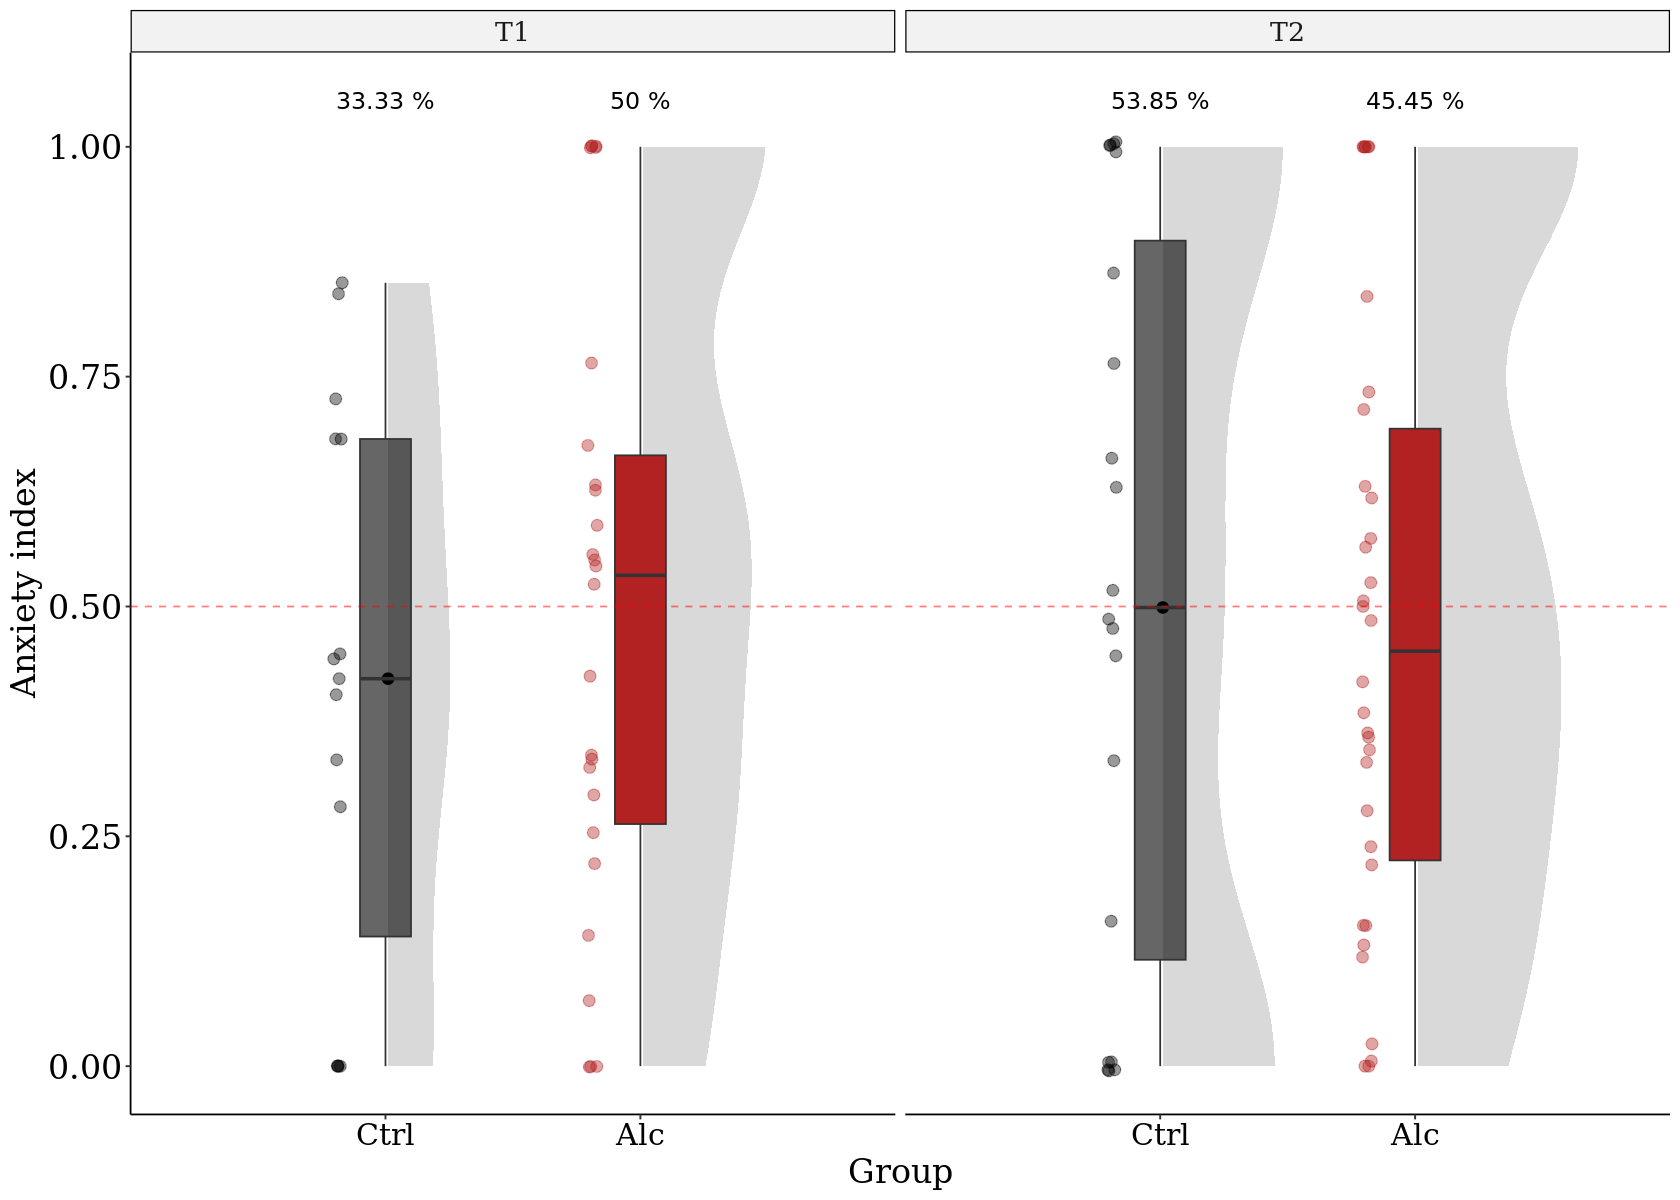

In [44]:
Plot_EPM.AI <- EPM_AI %>% 
  ggplot(aes(x = Group,y = Anxiety_index, 
             fill = Group)) + facet_grid(. ~ Stage) + 
  stat_halfeye(
      adjust = .8, width = .7, fill = "grey85",
      interval_colour = NA, 
      position = position_nudge(x = .01),
      aes(thickness = stat(f*n))) +
  xlab("Group") + ylab("Anxiety index") + 
  scale_color_manual(values = pal_group) +
  scale_fill_manual(values = pal_group) +
  geom_half_point(side = "l", aes(color = Group, fill = Group),
                  range_scale = .1, alpha = .4, size = 3) +
  geom_boxplot(width = .2) +
  theme_pubr() + theme_settings + 
  stat_compare_means(aes(label = ..p.signif..),method = "t.test",
                     label.x = 1.5, hide.ns = TRUE) + 
  theme(legend.position = "none") + 
  annotate("segment", x = 0, xend = 3, y = 0.5, yend = 0.5, colour = "red", linetype=2, alpha=0.5) + 
  geom_text(data = data.frame(Group = c(Perc_Group$Group[1],Perc_Group$Group[3]),
                                        Stage = c(Perc_Group$Stage[1],Perc_Group$Stage[2]), 
                                        label = c(paste0(round(Perc_Group$proportion[1],2)," %"),
                                                  paste0(round(Perc_Group$proportion[3],2)," %"))), 
            aes(x = 1, y = 1.05, label = label), size = 5) + 
  geom_text(data = data.frame(Group = c(Perc_Group$Group[3],Perc_Group$Group[4]),
                                        Stage = c(Perc_Group$Stage[3],Perc_Group$Stage[4]), 
                                        label = c(paste0(round(Perc_Group$proportion[2],2)," %"),
                                                  paste0(round(Perc_Group$proportion[4],2)," %"))), 
            aes(x = 2, y = 1.05, label = label), size = 5) 
Plot_EPM.AI

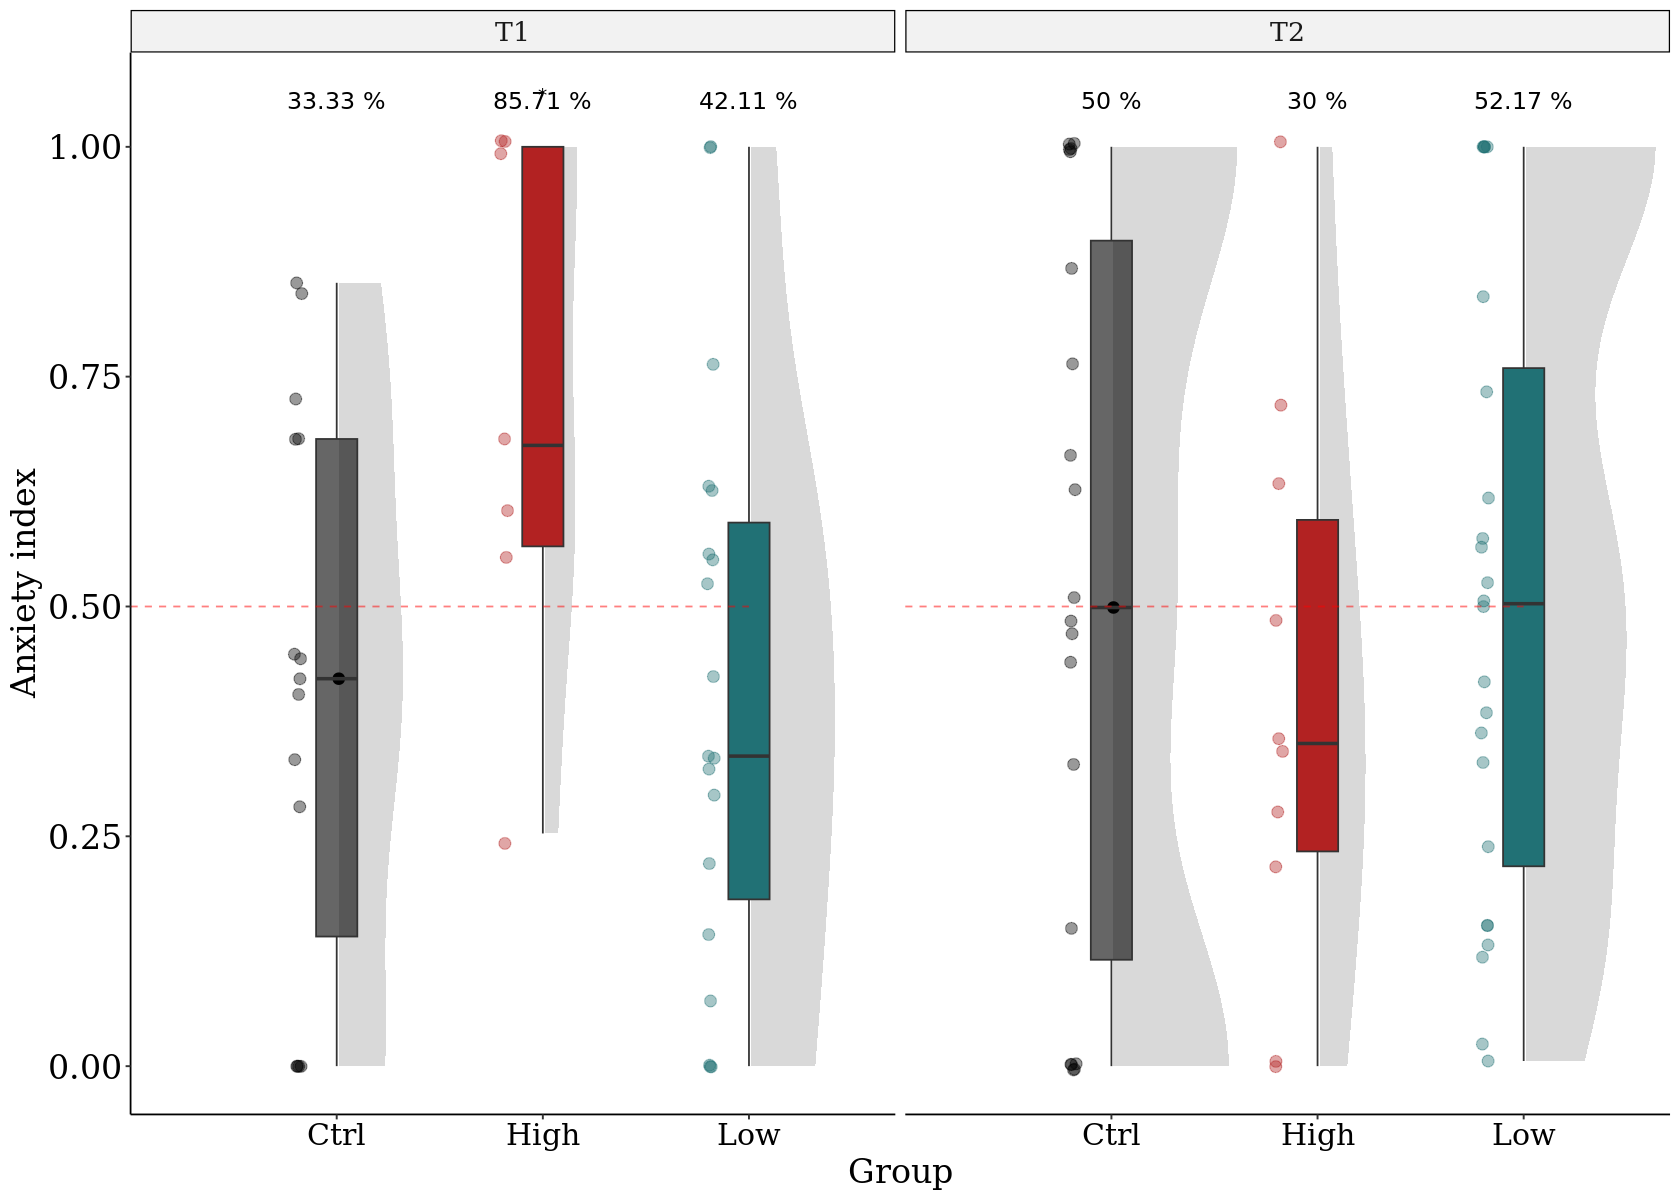

In [45]:
Plot_EPM.AI_class <- EPM_AI %>%
  ggplot(aes(x = class,y = Anxiety_index, 
             fill = class)) + facet_grid(. ~ Stage) +
  stat_halfeye(
      adjust = .8, width = .7, fill = "grey85",
      interval_colour = NA, 
      position = position_nudge(x = .01),
      aes(thickness = stat(f*n))) +
  xlab("Group") + ylab("Anxiety index") + 
  scale_color_manual(values = pal_group) +
  scale_fill_manual(values = pal_group) +
  geom_half_point(side = "l", aes(color = class, fill = class),
                  range_scale = .1, alpha = .4, size = 3) +
  geom_boxplot(width = .2) +
  theme_pubr() + theme(legend.position = "none") +
  stat_compare_means(aes(label = after_stat(p.signif)), 
                  method = "t.test", ref.group = "Ctrl", hide.ns = TRUE) + 
  theme_settings  + 
  annotate("segment", x = 0, xend = 3, y = 0.5, yend = 0.5, colour = "red", linetype=2, alpha=0.5) + 
  geom_text(data = data.frame(class = c(Perc_class$class[1],Perc_class$class[2]),
                                        Stage = c(Perc_class$Stage[1],Perc_class$Stage[2]), 
                                        label = c(paste0(round(Perc_class$proportion[1],2)," %"),
                                                  paste0(round(Perc_class$proportion[2],2)," %"))), 
            aes(x = 1, y = 1.05, label = label), size = 5) + 
  geom_text(data = data.frame(class = c(Perc_class$class[3],Perc_class$class[4]),
                                        Stage = c(Perc_class$Stage[3],Perc_class$Stage[4]), 
                                        label = c(paste0(round(Perc_class$proportion[3],2)," %"),
                                                  paste0(round(Perc_class$proportion[4],2)," %"))), 
            aes(x = 2, y = 1.05, label = label), size = 5) + 
  geom_text(data = data.frame(class = c(Perc_class$class[5],Perc_class$class[6]),
                                        Stage = c(Perc_class$Stage[5],Perc_class$Stage[6]), 
                                        label = c(paste0(round(Perc_class$proportion[5],2)," %"),
                                                  paste0(round(Perc_class$proportion[6],2)," %"))), 
            aes(x = 3, y = 1.05, label = label), size = 5)  
Plot_EPM.AI_class

### 5.1 Visualization by sex but only Behavior one stage

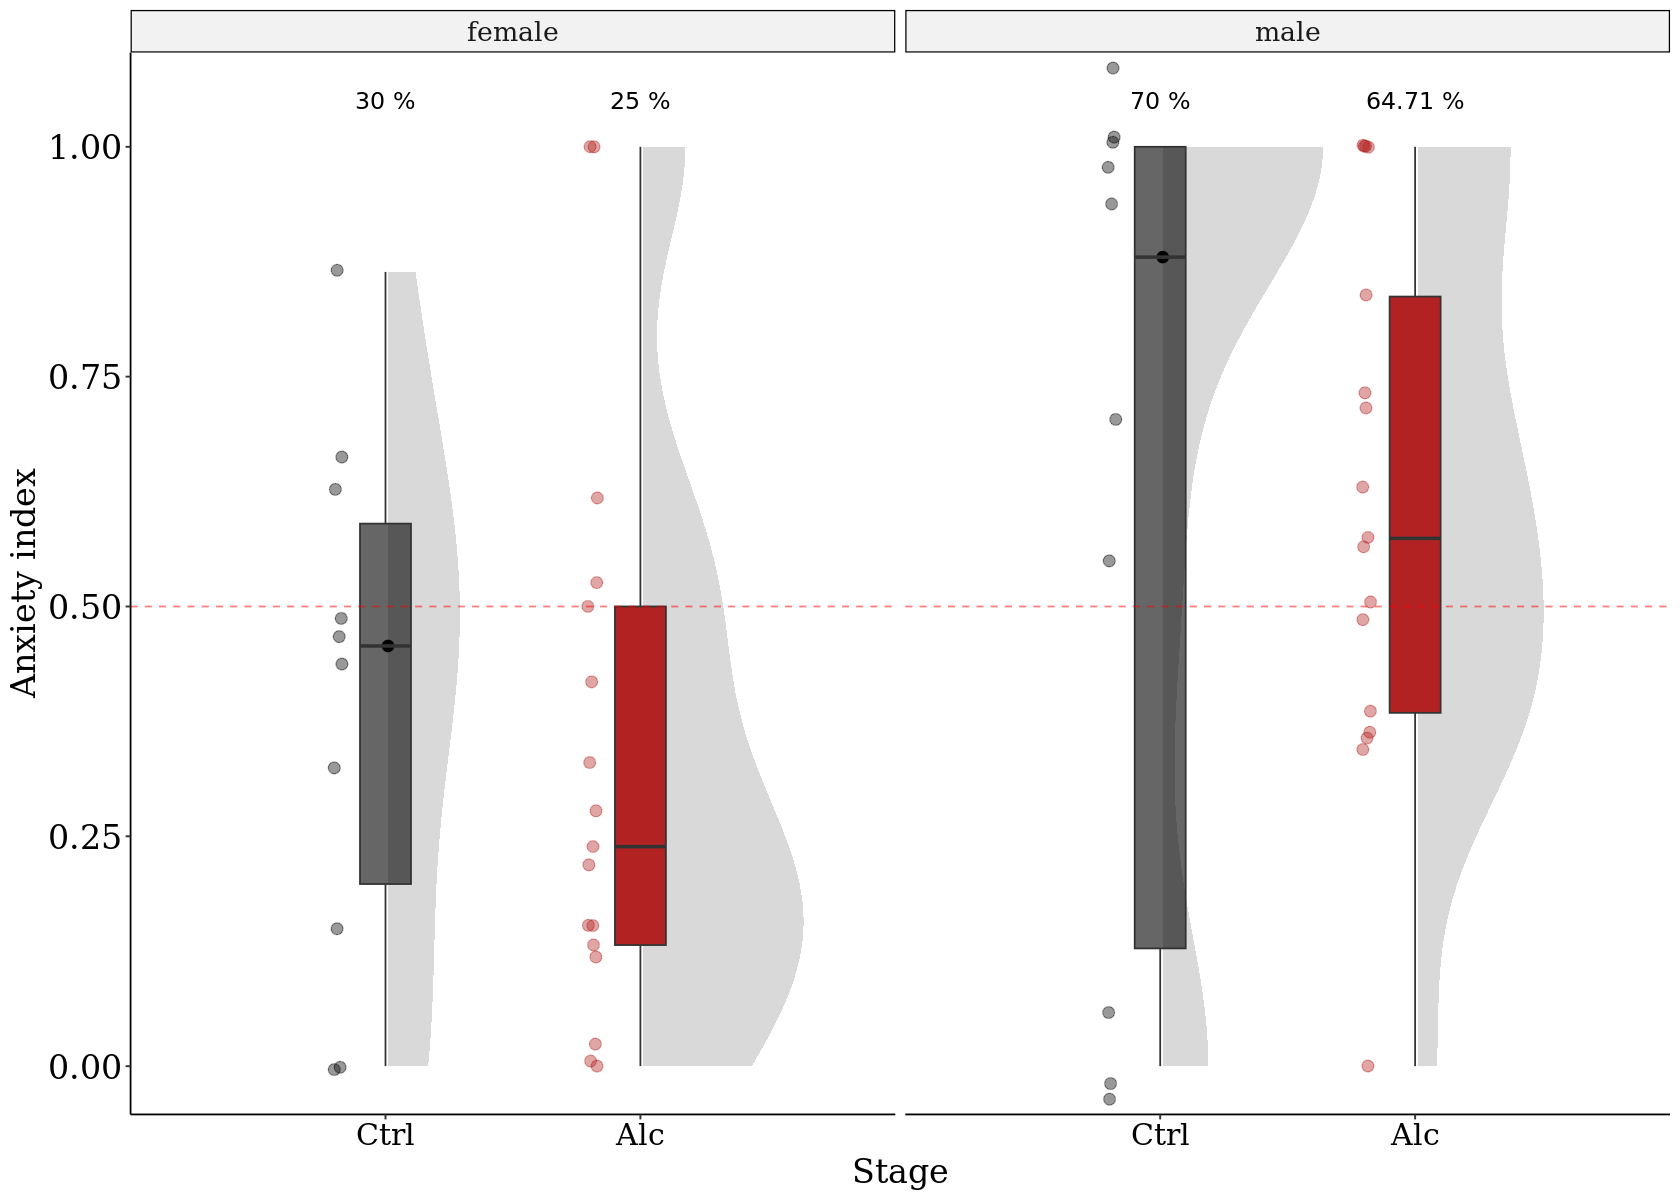

In [46]:
Sex.Plot_EPM.AI <- EPM_AI %>% filter(Stage == "T2") %>%
  ggplot(aes(x = Group,y = Anxiety_index, 
             fill = Group)) + facet_grid(. ~ Sex) +
  stat_halfeye(
      adjust = .8, width = .7, fill = "grey85",
      interval_colour = NA, 
      position = position_nudge(x = .01),
      aes(thickness = stat(f*n))) +
  xlab("Stage") + ylab("Anxiety index") + 
  scale_color_manual(values = pal_group) +
  scale_fill_manual(values = pal_group) +
  geom_half_point(side = "l", aes(color = Group, fill = Group),
                  range_scale = .1, alpha = .4, size = 3) +
  geom_boxplot(width = .2) +
  theme_pubr() + theme(legend.position = "none") +
  theme_settings  + 
  annotate("segment", x = 0, xend = 3, y = 0.5, yend = 0.5, colour = "red", linetype=2, alpha=0.5) + 
  geom_text(data = data.frame(Group = c(Perc_Group_sex$Group[1],Perc_Group_sex$Group[2]),
                              Sex = c(Perc_Group_sex$Sex[1],Perc_Group_sex$Sex[2]), 
                              label = c(paste0(round(Perc_Group_sex$proportion[1],2)," %"),
                                        paste0(round(Perc_Group_sex$proportion[2],2)," %"))), 
            aes(x = 1, y = 1.05, label = label), size = 5) + 
  geom_text(data = data.frame(Group = c(Perc_Group_sex$Group[3],Perc_Group_sex$Group[4]),
                              Sex = c(Perc_Group_sex$Sex[3],Perc_Group_sex$Sex[4]), 
                              label = c(paste0(round(Perc_Group_sex$proportion[3],2)," %"),
                                        paste0(round(Perc_Group_sex$proportion[4],2)," %"))), 
            aes(x = 2, y = 1.05, label = label), size = 5)
Sex.Plot_EPM.AI

In [47]:
Sex.Plot_EPM.AI_class1 <- EPM_AI %>% filter(Stage == "T1") %>%
  ggplot(aes(x = class,y = Anxiety_index, 
             fill = class)) + facet_grid(. ~ Sex) +
  stat_halfeye(
      adjust = .8, width = .7, fill = "grey85",
      interval_colour = NA, 
      position = position_nudge(x = .01),
      aes(thickness = stat(f*n))) +
  xlab("Group") + ylab("Anxiety index") + 
  scale_color_manual(values = pal_group) +
  scale_fill_manual(values = pal_group) +
  geom_half_point(side = "l", aes(color = class, fill = class),
                  range_scale = .1, alpha = .4, size = 3) +
  geom_boxplot(width = .2) +
  theme_pubr() + theme(legend.position = "none") +
  theme_settings

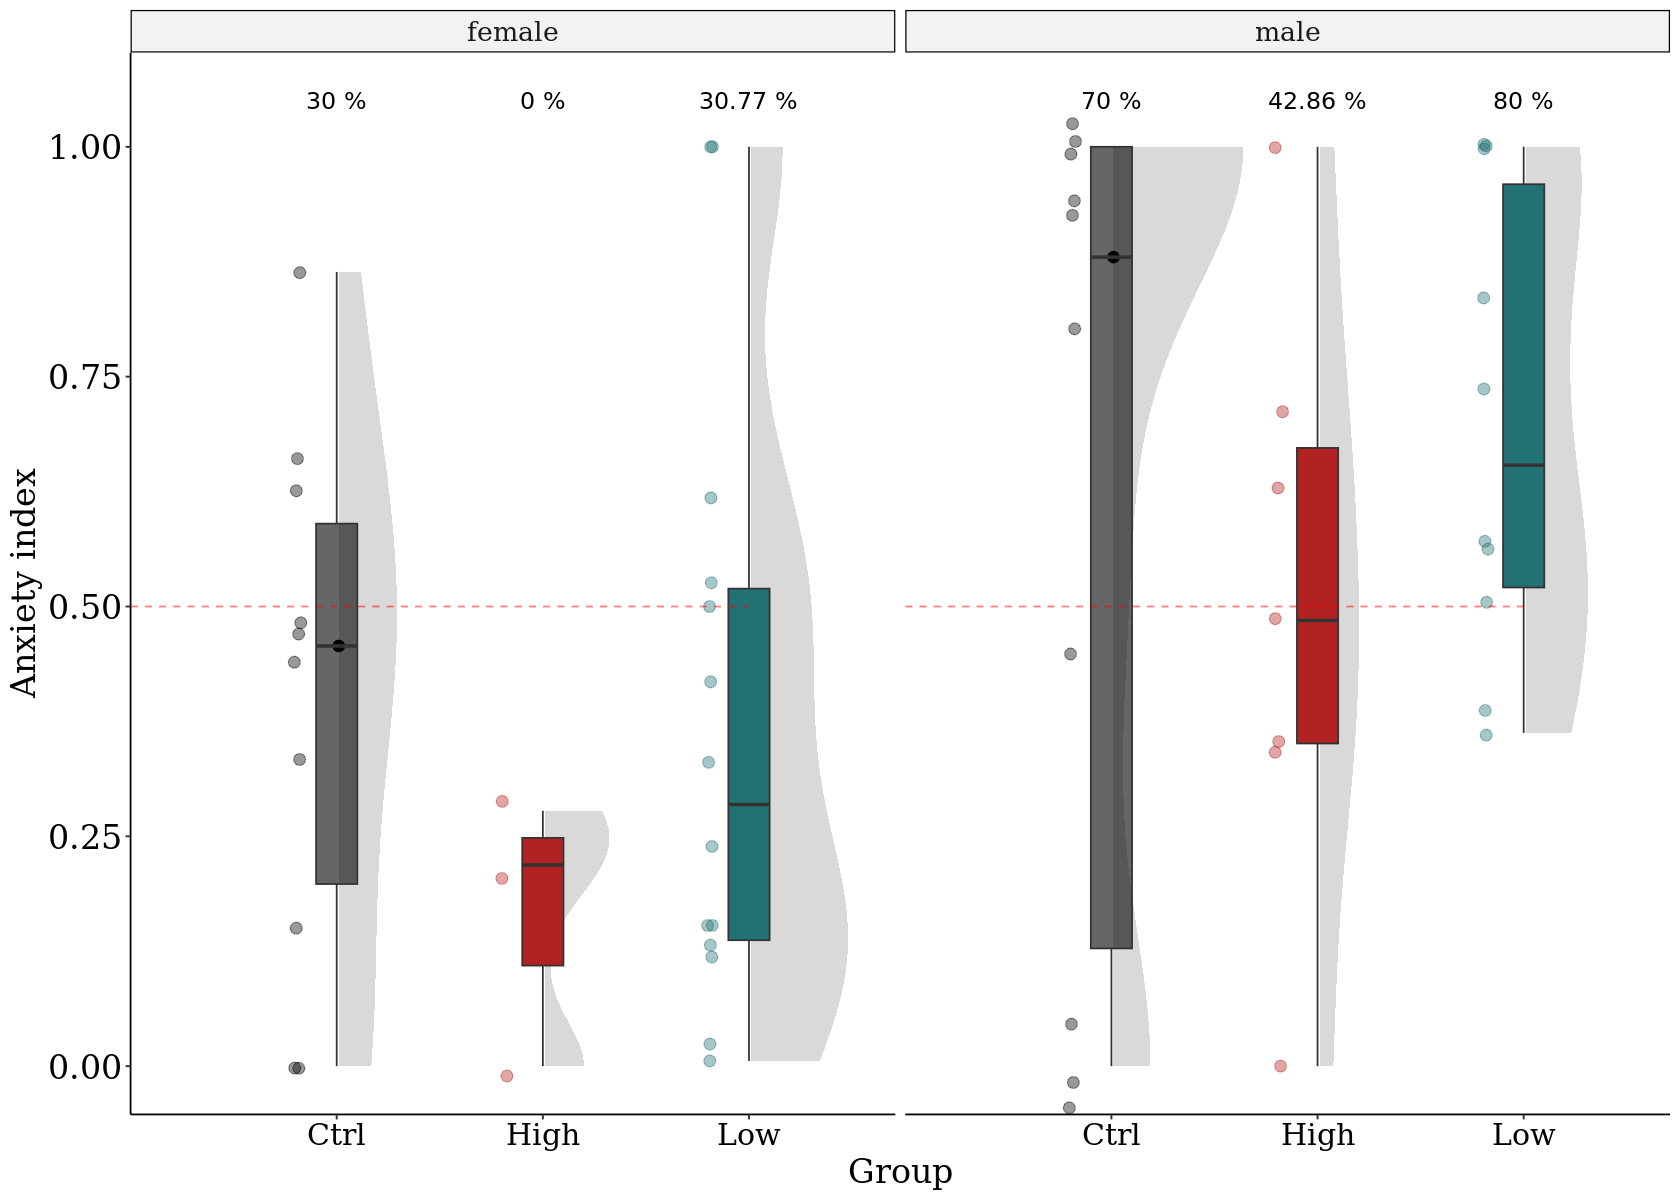

In [48]:
Sex.Plot_EPM.AI_class2 <- EPM_AI %>% filter(Stage == "T2") %>%
  ggplot(aes(x = class,y = Anxiety_index, 
             fill = class)) + facet_grid(. ~ Sex) +
  stat_halfeye(
      adjust = .8, width = .7, fill = "grey85",
      interval_colour = NA, 
      position = position_nudge(x = .01),
      aes(thickness = stat(f*n))) +
  xlab("Group") + ylab("Anxiety index") + 
  scale_color_manual(values = pal_group) +
  scale_fill_manual(values = pal_group) +
  geom_half_point(side = "l", aes(color = class, fill = class),position = position_dodge(width=0.75),
                  range_scale = .1, alpha = .4, size = 3) +
  geom_boxplot(width = .2) +
  theme_pubr() + theme(legend.position = "none") +
  theme_settings + 
  annotate("segment", x = 0, xend = 3, y = 0.5, yend = 0.5, colour = "red", linetype=2, alpha=0.5) + 
  geom_text(data = data.frame(class = c(Perc_class_sex$class[1],Perc_class_sex$class[2]),
                                        Sex = c(Perc_class_sex$Sex[1],Perc_class_sex$Sex[2]), 
                                        label = c(paste0(round(Perc_class_sex$proportion[1],2)," %"),
                                                  paste0(round(Perc_class_sex$proportion[2],2)," %"))), 
            aes(x = 1, y = 1.05, label = label), size = 5) + 
  geom_text(data = data.frame(class = c(Perc_class_sex$class[3],Perc_class_sex$class[4]),
                                        Sex = c(Perc_class_sex$Sex[3],Perc_class_sex$Sex[4]), 
                                        label = c(paste0(round(Perc_class_sex$proportion[3],2)," %"),
                                                  paste0(round(Perc_class_sex$proportion[4],2)," %"))), 
            aes(x = 2, y = 1.05, label = label), size = 5) + 
  geom_text(data = data.frame(class = c(Perc_class_sex$class[5],Perc_class_sex$class[6]),
                                        Sex = c(Perc_class_sex$Sex[5],Perc_class_sex$Sex[6]), 
                                        label = c(paste0(round(Perc_class_sex$proportion[5],2)," %"),
                                                  paste0(round(Perc_class_sex$proportion[6],2)," %"))), 
            aes(x = 3, y = 1.05, label = label), size = 5) 

Sex.Plot_EPM.AI_class2

## **6. Export data**

In [50]:
dir.create("Figures/EPM_min")

In [51]:
ggsave(plot = Plot_EPM.AI, dpi=300,height = 8, width = 12,bg="white",
       filename = "Figures/EPM_min/Plot_EPM_AI.png")

ggsave(plot = Plot_EPM.AI_class, dpi=300,height = 8, width = 12,bg="white",
       filename = "Figures/EPM_min/Plot_EPM_AI_class.png")

ggsave(plot = Sex.Plot_EPM.AI, dpi=300,height = 8, width = 12,bg="white",
       filename = "Figures/EPM_min/Sex_Plot_EPM_AI.png")

ggsave(plot = Sex.Plot_EPM.AI_class2, dpi=300,height = 8, width = 12,bg="white",
       filename = "Figures/EPM_min/Sex_Plot_EPM_AI_class2.png")

In [52]:
save(Report_DLC,EPM_AI,Plot_EPM.AI,Plot_EPM.AI_class,Sex.Plot_EPM.AI,Sex.Plot_EPM.AI_class2, file = paste0(getwd(),"/Data/Behavior_metricsEPM_short.RData"))

---
# **Novel object recognition**
---

## **2. Data preparation**

Reading files and set it all up.

Firstly, run the functions made by Sturman et al, (2020) and the modified function for NOR, the script is in:

[script](https://github.com/psilantrolab/Sudmex-alcohol-rat/blob/main/code/DLCAnalyzer_NOR.R)

Secondly, create the function to read, calibrating and analysis of the tracking accordingly with each batch recording (camera parameters)

Frames per second (fps):
- Batch 1: 7.5
- Batch 2: 30
- Batch 3: 7.5
- Batch 4: 7.5
- Batch 5: 16.6

#### Important: 

The nose is the point to consider if the rat is in which object

In [ ]:
NOR_input_folder <- paste0(getwd(),"/Data/Behavior/NOR/NOR/")
OR_input_folder <- paste0(getwd(),"/Data/Behavior/NOR/OR/")
RID_group <- read_csv("Data/RID.csv")
Class_group <- read_csv("Data/Class.csv")

DLCmetrics_selectionNOR <- c('file', 'nose.ob.distance.moving', 'nose.ob.speed.moving','nose.ob.time.moving', 
                             'nose.ob.total.time', 'nose.ob.time.stationary','nose.ob.transitions','nose.nob.distance.moving', 'nose.nob.speed.moving',
                             'nose.nob.time.moving', 'nose.nob.total.time', 'nose.nob.time.stationary','nose.nob.transitions')

### **2.1 Create functions accordingly with each batch**

In [60]:
# Create function ---------------------------------------------------------

ROpipeline_134 <- function(path){
    Tracking <- ReadDLCDataFromCSV(file = path, fps = 7.5)
    Tracking <- CleanTrackingData(Tracking, likelihoodcutoff = 0.95)
    Tracking <- CalibrateTrackingData(Tracking, "area",in.metric = 42*42, points = c("tl","tr","br","bl"))
    PlotPointData(Tracking, points = c("nose"))
    zoneinfo <- read.table(paste0(getwd(),"/code/DLC/RO.csv"), sep = ";", header = T)
    Tracking <- AddZones(Tracking,zoneinfo)
    Tracking <- objet(Tracking, 7)
    Tracking <- CleanTrackingData(Tracking, likelihoodcutoff = 0.95,existence.pol = ScalePolygon(Tracking$zones$arena, 1.2))
    Tracking <- AnalysisRO(Tracking, movement_cutoff = 4,integration_period = 5,points = "nose", nosedips = FALSE)
    return(Tracking)
  }

ROpipeline_2 <- function(path){
    Tracking <- ReadDLCDataFromCSV(file = path, fps = 30)
    Tracking <- CleanTrackingData(Tracking, likelihoodcutoff = 0.95)
    Tracking <- CalibrateTrackingData(Tracking, "area",in.metric = 42*42, points = c("tl","tr","br","bl"))
    PlotPointData(Tracking, points = c("nose"))
    zoneinfo <- read.table(paste0(getwd(),"/code/DLC/RO.csv"), sep = ";", header = T)
    Tracking <- AddZones(Tracking,zoneinfo)
    Tracking <- objet(Tracking, 7)
    Tracking <- CleanTrackingData(Tracking, likelihoodcutoff = 0.95,existence.pol = ScalePolygon(Tracking$zones$arena, 1.2))
    Tracking <- AnalysisRO(Tracking, movement_cutoff = 4,integration_period = 5,points = "nose", nosedips = FALSE)
    return(Tracking)
  }

ROpipeline_5 <- function(path){
    Tracking <- ReadDLCDataFromCSV(file = path, fps = 16.6)
    Tracking <- CleanTrackingData(Tracking, likelihoodcutoff = 0.95)
    Tracking <- CalibrateTrackingData(Tracking, "area",in.metric = 42*42, points = c("tl","tr","br","bl"))
    PlotPointData(Tracking, points = c("nose"))
    zoneinfo <- read.table(paste0(getwd(),"/code/DLC/RO.csv"), sep = ";", header = T)
    Tracking <- AddZones(Tracking,zoneinfo)
    Tracking <- objet(Tracking, 7)
    Tracking <- CleanTrackingData(Tracking, likelihoodcutoff = 0.95,existence.pol = ScalePolygon(Tracking$zones$arena, 1.2))
    Tracking <- AnalysisRO(Tracking, movement_cutoff = 4,integration_period = 5,points = "nose", nosedips = FALSE)
    return(Tracking)
  }

### **2.2 Analyze tracking with DLC analyzer**

In [ ]:
# Batch 1

### OR ###
B1_files_OR <- list.files(OR_input_folder, pattern = "G1", recursive = T)
B1_TrackingAll_OR <- RunPipeline(B1_files_OR,OR_input_folder,FUN = ROpipeline_134)
B1_Report_OR <- MultiFileReport(B1_TrackingAll_OR) %>% dplyr::select(all_of(DLCmetrics_selectionNOR))

### NOR ###

B1_files_NOR <- list.files(NOR_input_folder, pattern = "G1", recursive = T)
B1_TrackingAll_NOR <- RunPipeline(B1_files_NOR,NOR_input_folder,FUN = ROpipeline_134)
B1_Report_NOR <- MultiFileReport(B1_TrackingAll_NOR) %>% dplyr::select(all_of(DLCmetrics_selectionNOR))


In [ ]:
# Batch 2

### OR ###
B2_files_OR <- list.files(OR_input_folder, pattern = "G2", recursive = T)
B2_TrackingAll_OR <- RunPipeline(B2_files_OR,OR_input_folder,FUN = ROpipeline_2)
B2_Report_OR <- MultiFileReport(B2_TrackingAll_OR) %>% dplyr::select(all_of(DLCmetrics_selectionNOR))

### NOR ###
B2_files_NOR <- list.files(NOR_input_folder, pattern = "G2", recursive = T)
B2_TrackingAll_NOR <- RunPipeline(B2_files_NOR,NOR_input_folder,FUN = ROpipeline_2)
B2_Report_NOR <- MultiFileReport(B2_TrackingAll_NOR) %>% dplyr::select(all_of(DLCmetrics_selectionNOR))


In [ ]:
# Batch 3

### OR ###
B3_files_OR <- list.files(OR_input_folder, pattern = "G3", recursive = T)
B3_TrackingAll_OR <- RunPipeline(B3_files_OR,OR_input_folder,FUN = ROpipeline_134)
B3_Report_OR <- MultiFileReport(B3_TrackingAll_OR) %>% dplyr::select(all_of(DLCmetrics_selectionNOR))

### NOR ###
B3_files_NOR <- list.files(NOR_input_folder, pattern = "G3", recursive = T)
B3_TrackingAll_NOR <- RunPipeline(B3_files_NOR,NOR_input_folder,FUN = ROpipeline_134)
B3_Report_NOR <- MultiFileReport(B3_TrackingAll_NOR) %>% dplyr::select(all_of(DLCmetrics_selectionNOR))


In [ ]:
# Batch 4

### OR ###
B4_files_OR <- list.files(OR_input_folder, pattern = "G4", recursive = T)
B4_TrackingAll_OR <- RunPipeline(B4_files_OR,OR_input_folder,FUN = ROpipeline_134)
B4_Report_OR <- MultiFileReport(B4_TrackingAll_OR) %>% dplyr::select(all_of(DLCmetrics_selectionNOR))

### NOR ###
B4_files_NOR <- list.files(NOR_input_folder, pattern = "G4", recursive = T)
B4_TrackingAll_NOR <- RunPipeline(B4_files_NOR,NOR_input_folder,FUN = ROpipeline_134)
B4_Report_NOR <- MultiFileReport(B4_TrackingAll_NOR) %>% dplyr::select(all_of(DLCmetrics_selectionNOR))
 

In [ ]:
# Batch 5

### OR ###
B5_files_OR <- list.files(OR_input_folder, pattern = "G[5,6]", recursive = T)
B5_TrackingAll_OR <- RunPipeline(B5_files_OR,OR_input_folder,FUN = ROpipeline_5)
B5_Report_OR <- MultiFileReport(B5_TrackingAll_OR) %>% dplyr::select(all_of(DLCmetrics_selectionNOR))

### NOR ###
B5_files_NOR <- list.files(NOR_input_folder, pattern = "G[5,6]", recursive = T)
B5_TrackingAll_NOR <- RunPipeline(B5_files_NOR,NOR_input_folder,FUN = ROpipeline_5)
B5_Report_NOR <- MultiFileReport(B5_TrackingAll_NOR) %>% dplyr::select(all_of(DLCmetrics_selectionNOR))
 

### **2.3 Binding and arranging**

In [70]:
Report_OR <- rbind.data.frame(B1_Report_OR,B2_Report_OR,B3_Report_OR,B4_Report_OR,B5_Report_OR)
Report_OR <- Report_OR %>% 
             add_column(RID = paste0("sub-", str_split(Report_OR$file, n = 4, pattern = "_") %>% 
                        map_chr(~ .x %>% extract(2))) ,.before = 1) %>% 
             left_join(RID_group, by = "RID") %>% add_column(Phase = rep("OR",length(Report_OR$file)) )

Report_NOR <- rbind.data.frame(B1_Report_NOR,B2_Report_NOR,B3_Report_NOR,B4_Report_NOR,B5_Report_NOR) 
Report_NOR <- Report_NOR %>% 
             add_column(RID = paste0("sub-", str_split(Report_NOR$file, n = 4, pattern = "_") %>% 
                                     map_chr(~ .x %>% extract(2))) ,.before = 1) %>% 
             left_join(RID_group, by = "RID") %>% add_column(Phase = rep("NOR",length(Report_NOR$file)) )

NOR_Report_DLC <- rbind.data.frame(Report_OR,Report_NOR) %>% left_join(Class_group %>% dplyr::select(-Sex), by = "RID") %>%
                  mutate(class = class %>% replace_na('Ctrl')) 

## **3. Analysis**


### **3.1 Novel object recognition**

In [208]:
NOR_timeObj <- NOR_Report_DLC %>% dplyr::select(RID,Group,class,Batch,Sex,Phase,nose.ob.total.time,nose.nob.total.time) %>%
                pivot_longer(cols = c(nose.ob.total.time, nose.nob.total.time), 
                             names_to = "Object", values_to = "Time") %>%
                filter(Group == "Alc" | Group == "Ctrl") %>% ## Filtering by groups of interest  
                mutate(Group = factor(Group, levels = c("Ctrl", "Alc")),
                       class = factor(class, levels = c("Ctrl", "Low","High")),
                RID = factor(RID),
                Phase = factor(Phase),
                Object = factor(Object),
                Sex = factor(Sex),
                Object = case_when(Object == "nose.ob.total.time" ~ "Familiar",
                                   Object == "nose.nob.total.time" ~ "Novel")) %>% 
                pivot_wider(names_from = Object, values_from = Time) %>% 
                mutate(resta = (Novel-Familiar),
                       suma = (Novel+Familiar),
                       PI = if_else(is.nan(Novel/suma),0,(Novel/suma))) %>% na.omit()  %>%
                filter(Phase == "NOR") %>% convert_as_factor(Batch)

In [209]:
NOR_entries <- NOR_Report_DLC %>% dplyr::select(RID,Group,class,Batch,Sex,Phase,nose.ob.transitions,nose.nob.transitions) %>%
                pivot_longer(cols = c(nose.ob.transitions, nose.nob.transitions	), 
                             names_to = "Obj_entries", values_to = "Entries") %>%
                filter(Group == "Alc" | Group == "Ctrl") %>% ## Filtering by groups of interest  
                mutate(Group = factor(Group, levels = c("Ctrl", "Alc")),
                       class = factor(class, levels = c("Ctrl", "Low","High")),
                RID = factor(RID),
                Phase = factor(Phase),
                Obj_entries = factor(Obj_entries),
                Sex = factor(Sex),
                Obj_entries = case_when(Obj_entries == "nose.ob.transitions" ~ "Familiar_entries",
                                        Obj_entries == "nose.nob.transitions" ~ "Novel_entries")) %>% 
                pivot_wider(names_from = Obj_entries, values_from = Entries) %>% 
                mutate(resta_entries = (Novel_entries-Familiar_entries),
                       suma_entries = (Familiar_entries+Novel_entries),
                       PI_entries = if_else(is.nan(Novel_entries/suma_entries),0,(Novel_entries/suma_entries))) %>% na.omit()  %>%
                filter(Phase == "NOR") %>% convert_as_factor(Batch)

### **3.2 Interaction index**

In [210]:
NOR_II <- left_join(NOR_timeObj,NOR_entries) %>% mutate(Interaction_index = (( ((PI) + (PI_entries)) / 2 ) ) ) %>% 
          left_join(Class_group) %>% convert_as_factor(Sex,Group)

Joining with `by = join_by(RID, Group, class, Batch, Sex, Phase)`
Joining with `by = join_by(RID, class, Sex)`


## **4. Exploratory data analysis**

In [211]:
NOR_timeObj %>% skimr::skim()

,skim_type,skim_variable,n_missing,complete_rate,factor.ordered,factor.n_unique,factor.top_counts,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,numeric.hist
,<chr>,<chr>,<int>,<dbl>,<lgl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,factor,RID,0,1,FALSE,52,"sub: 1, sub: 1, sub: 1, sub: 1",NA,NA,NA,NA,NA,NA,NA,NA
2,factor,Group,0,1,FALSE,2,"Alc: 32, Ctr: 20",NA,NA,NA,NA,NA,NA,NA,NA
3,factor,class,0,1,FALSE,3,"Low: 24, Ctr: 20, Hig: 8",NA,NA,NA,NA,NA,NA,NA,NA
4,factor,Batch,0,1,FALSE,5,"B3: 15, B2: 11, B1: 10, B4: 8",NA,NA,NA,NA,NA,NA,NA,NA
5,factor,Sex,0,1,FALSE,2,"fem: 27, mal: 25",NA,NA,NA,NA,NA,NA,NA,NA
6,factor,Phase,0,1,FALSE,1,"NOR: 52, OR: 0",NA,NA,NA,NA,NA,NA,NA,NA
7,numeric,Familiar,0,1,NA,NA,NA,19.5803058,10.7837621,5.4666667,12.4250000,17.5500000,24.3000000,50.1807229,▇▇▃▁▁
8,numeric,Novel,0,1,NA,NA,NA,34.6730383,20.2233388,8.9333333,20.0333333,30.6666667,42.6333333,116.4000000,▇▅▂▁▁
9,numeric,resta,0,1,NA,NA,NA,15.0927325,22.6108473,-24.4578313,2.6150602,11.4666667,25.2083333,104.0000000,▃▇▂▁▁


── Data Summary ────────────────────────
                           Values    
Name                       Piped data
Number of rows             52        
Number of columns          11        
_______________________              
Column type frequency:               
  factor                   6         
  numeric                  5         
________________________             
Group variables            None      

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique
1 RID                   0             1 FALSE         52
2 Group                 0             1 FALSE          2
3 class                 0             1 FALSE          3
4 Batch                 0             1 FALSE          5
5 Sex                   0             1 FALSE          2
6 Phase                 0             1 FALSE          1
  top_counts                    
1 sub: 1, sub: 1, sub: 1, sub: 1
2 Alc: 32, Ctr: 20              

In [212]:
NOR_timeObj %>% group_by(Group,Sex) %>% identify_outliers(PI)

Group,Sex,RID,class,Batch,Phase,Familiar,Novel,resta,suma,PI,is.outlier,is.extreme
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>


### **4.1 Stats (hyphotesis testing)**

In [213]:
NOR.shapiro <-NOR_II %>% 
    shapiro_test(PI)
NOR.shapiro

variable,statistic,p
<chr>,<dbl>,<dbl>
PI,0.9647954,0.1263359


In [214]:
NOR.levene <-NOR_II %>% 
    levene_test(PI~Group)
NOR.levene

df1,df2,statistic,p
<int>,<int>,<dbl>,<dbl>
1,50,0.0008160126,0.9773245


In [215]:
NOR_novel.aov <- anova_test(data = NOR_II, dv = PI, wid = RID,
           between = c(Group,Sex))
NOR_novel.aov

,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,Group,1,48,0.796,0.377,,0.016
2,Sex,1,48,0.801,0.375,,0.016
3,Group:Sex,1,48,0.191,0.664,,0.004


In [216]:
NOR_novel.aov_class <- anova_test(data = NOR_II, dv = PI, wid = RID,
           between = c(class,Sex))
NOR_novel.aov_class

,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,class,2,46,0.366,0.695,,0.016000
2,Sex,1,46,0.021,0.884,,0.000465
3,class:Sex,2,46,2.999,0.060,,0.115000


In [217]:
NOR_novel.pwcC <- NOR_II %>% 
  pairwise_t_test(
    PI ~ Group,  
    p.adjust.method = "fdr")
NOR_novel.pwcC

,.y.,group1,group2,n1,n2,p,p.signif,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>
1,PI,Ctrl,Alc,20,32,0.351,ns,0.351,ns


In [218]:
Sex.NOR_novel.pwcC <- NOR_II %>% group_by(Sex) %>%
  pairwise_t_test(
    PI ~ Group,  
    p.adjust.method = "fdr")
Sex.NOR_novel.pwcC

,Sex,.y.,group1,group2,n1,n2,p,p.signif,p.adj,p.adj.signif
,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>
1,female,PI,Ctrl,Alc,10,17,0.384,ns,0.384,ns
2,male,PI,Ctrl,Alc,10,15,0.731,ns,0.731,ns


In [219]:
NOR_novel.pwcC_class <- NOR_II %>%
  pairwise_t_test(
    PI ~ class,
    p.adjust.method = "fdr")
NOR_novel.pwcC_class

,.y.,group1,group2,n1,n2,p,p.signif,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>
1,PI,Ctrl,High,20,8,0.721,ns,0.721,ns
2,PI,Ctrl,Low,20,24,0.319,ns,0.721,ns
3,PI,High,Low,8,24,0.707,ns,0.721,ns


In [220]:
Sex.NOR_novel.pwcC_class <- NOR_II %>% group_by(Sex) %>%
  pairwise_wilcox_test(
    PI ~ class,
    p.adjust.method = "fdr")
Sex.NOR_novel.pwcC_class

,Sex,.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif
,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,female,PI,Ctrl,High,10,3,11,0.573,0.573,ns
2,female,PI,Ctrl,Low,10,14,92,0.212,0.318,ns
3,female,PI,High,Low,3,14,37,0.047,0.141,ns
4,male,PI,Ctrl,High,10,5,36,0.206,0.309,ns
5,male,PI,Ctrl,Low,10,10,45,0.739,0.739,ns
6,male,PI,High,Low,5,10,13,0.165,0.309,ns


In [221]:
Sex.NOR_novel.pwcC_class <- NOR_II %>% group_by(class) %>%
  pairwise_t_test(
    PI ~ Sex,
    p.adjust.method = "fdr")
Sex.NOR_novel.pwcC_class

,class,.y.,group1,group2,n1,n2,p,p.signif,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>
1,Ctrl,PI,female,male,10,10,0.7820,ns,0.7820,ns
2,High,PI,female,male,3,5,0.1510,ns,0.1510,ns
3,Low,PI,female,male,14,10,0.0349,*,0.0349,*


### **4.1 Stats (Modelling)**

In [223]:
Model_PI <- lm(formula = PI ~ Group*Sex+Batch, data = NOR_II)
Model_PI_Intake <- lm(formula = PI ~ class*Sex+Batch, data = NOR_II)

In [224]:
emmeans_PI <- emmeans(Model_PI, specs = pairwise ~ Group*Sex, adjust="fdr")
emmeans_PI$contrasts %>% as_tibble() %>% filter(p.value < 0.05) %>% add_significance()

contrast,estimate,SE,df,t.ratio,p.value,p.value.signif
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>


In [225]:
emmeans_PI_Intake <- emmeans(Model_PI_Intake, specs = pairwise ~ class*Sex, adjust="fdr")
emmeans_PI_Intake$contrasts %>% as_tibble() %>% filter(p.value < 0.05) %>% add_significance()

contrast,estimate,SE,df,t.ratio,p.value,p.value.signif
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>


In [226]:
Model_PI_Intake %>% report()

We fitted a linear model (estimated using OLS) to predict PI with class, Sex
and Batch (formula: PI ~ class * Sex + Batch). The model explains a
statistically not significant and moderate proportion of variance (R2 = 0.24,
F(9, 42) = 1.45, p = 0.197, adj. R2 = 0.07). The model's intercept,
corresponding to class = Ctrl, Sex = female and Batch = B1, is at 0.61 (95% CI
[0.48, 0.74], t(42) = 9.46, p < .001). Within this model:

  - The effect of class [High] is statistically non-significant and positive
(beta = 0.07, 95% CI [-0.14, 0.27], t(42) = 0.67, p = 0.505; Std. beta = 0.43,
95% CI [-0.87, 1.73])
  - The effect of class [Low] is statistically non-significant and negative (beta
= -0.08, 95% CI [-0.21, 0.04], t(42) = -1.33, p = 0.190; Std. beta = -0.53, 95%
CI [-1.35, 0.28])
  - The effect of Sex [male] is statistically non-significant and positive (beta
= 0.02, 95% CI [-0.12, 0.16], t(42) = 0.27, p = 0.786; Std. beta = 0.12, 95% CI
[-0.75, 0.99])
  - The effect of Batch [B2] is statistically non-significant and positive (beta
= 0.07, 95% CI [-0.07, 0.20], t(42) = 1.00, p = 0.325; Std. beta = 0.42, 95% CI
[-0.43, 1.27])
  - The effect of Batch [B3] is statistically non-significant and positive (beta
= 0.02, 95% CI [-0.11, 0.15], t(42) = 0.35, p = 0.732; Std. beta = 0.14, 95% CI
[-0.67, 0.95])
  - The effect of Batch [B4] is statistically non-significant and positive (beta
= 0.09, 95% CI [-0.06, 0.24], t(42) = 1.24, p = 0.223; Std. beta = 0.57, 95% CI
[-0.36, 1.50])
  - The effect of Batch [B5] is statistically non-significant and negative (beta
= -0.06, 95% CI [-0.21, 0.09], t(42) = -0.80, p = 0.429; Std. beta = -0.37, 95%
CI [-1.32, 0.57])
  - The effect of class [High] × Sex [male] is statistically non-significant and
negative (beta = -0.17, 95% CI [-0.43, 0.10], t(42) = -1.27, p = 0.211; Std.
beta = -1.05, 95% CI [-2.73, 0.62])
  - The effect of class [Low] × Sex [male] is statistically non-significant and
positive (beta = 0.10, 95% CI [-0.09, 0.29], t(42) = 1.03, p = 0.309; Std. beta
= 0.61, 95% CI [-0.59, 1.81])

Standardized parameters were obtained by fitting the model on a standardized
version of the dataset. 95% Confidence Intervals (CIs) and p-values were
computed using a Wald t-distribution approximation.

## **5. Visualization**


In [240]:
NOR.Perc_Group <- NOR_II %>% group_by(Group) %>% 
              summarise(proportion = (sum(Interaction_index > 0.5,na.rm = T)/(sum(Interaction_index < 0.5,na.rm = T) + sum(Interaction_index > 0.5,na.rm = T))) * 100 )
NOR.Perc_class <- NOR_II %>% group_by(class) %>% 
              summarise(proportion = (sum(Interaction_index > 0.5,na.rm = T)/(sum(Interaction_index < 0.5,na.rm = T) + sum(Interaction_index > 0.5,na.rm = T))) * 100 )
NOR.Perc_Group_sex <- NOR_II %>% group_by(Group,Sex) %>% 
              summarise(proportion = (sum(Interaction_index > 0.5,na.rm = T)/(sum(Interaction_index < 0.5,na.rm = T) + sum(Interaction_index > 0.5,na.rm = T))) * 100 )
NOR.Perc_class_sex <- NOR_II %>% group_by(class,Sex) %>% 
              summarise(proportion = (sum(Interaction_index > 0.5,na.rm = T)/(sum(Interaction_index < 0.5,na.rm = T) + sum(Interaction_index > 0.5,na.rm = T))) * 100 )


`summarise()` has grouped output by 'Group'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'class'. You can override using the `.groups` argument.


In [248]:
NOR.Perc_Group <- NOR_II %>% group_by(Group) %>% 
              summarise(proportion = (sum(PI > 0.5,na.rm = T)/(sum(PI < 0.5,na.rm = T) + sum(PI > 0.5,na.rm = T))) * 100 )
NOR.Perc_class <- NOR_II %>% group_by(class) %>% 
              summarise(proportion = (sum(PI > 0.5,na.rm = T)/(sum(PI < 0.5,na.rm = T) + sum(PI > 0.5,na.rm = T))) * 100 )
NOR.Perc_Group_sex <- NOR_II %>% group_by(Group,Sex) %>% 
              summarise(proportion = (sum(PI > 0.5,na.rm = T)/(sum(PI < 0.5,na.rm = T) + sum(PI > 0.5,na.rm = T))) * 100 )
NOR.Perc_class_sex <- NOR_II %>% group_by(class,Sex) %>% 
              summarise(proportion = (sum(PI > 0.5,na.rm = T)/(sum(PI < 0.5,na.rm = T) + sum(PI > 0.5,na.rm = T))) * 100 )


`summarise()` has grouped output by 'Group'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'class'. You can override using the `.groups` argument.


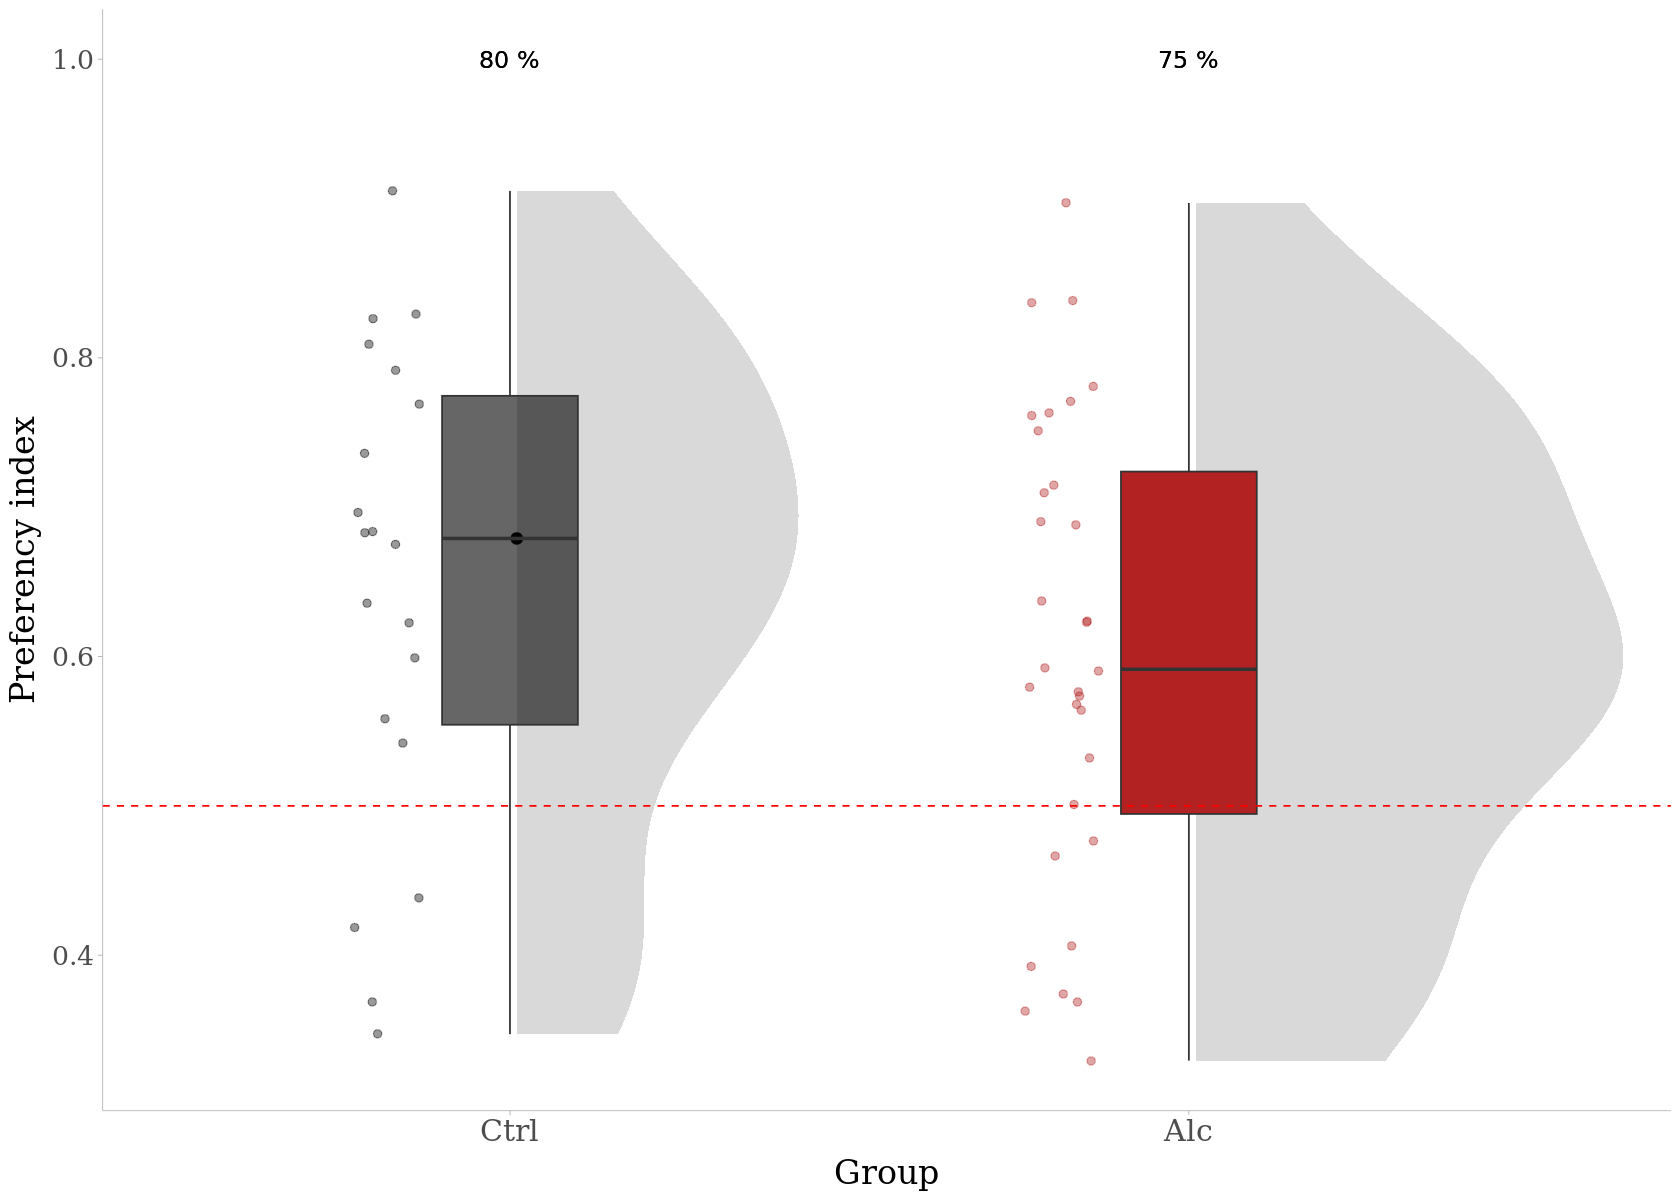

In [249]:
plot_NOR <- NOR_II %>%
  ggplot(aes(x = Group,y = PI, 
             fill = Group)) + 
  stat_halfeye(
      adjust = .8, width = .7, fill = "grey85",
      interval_colour = NA, 
      position = position_nudge(x = .01),
      aes(thickness = stat(f*n))) +
  gghalves::geom_half_point(aes(color = Group),
                            side = "l", 
                            range_scale = .3, 
                            alpha = .4, size = 2) +
  geom_boxplot(width = .2) + 
  #stat_pvalue_manual(NOR_novel.pwcC,
  #                   tip.length = 0.03, hide.ns = FALSE) +
  #labs(subtitle = get_test_label(NOR_novel.pwcC, 
  #                               detailed = TRUE)) +
  #stat_compare_means(aes(label = after_stat(p.signif)), 
  #                method = "t.test", ref.group = "Ctrl", hide.ns = TRUE) +
  ylab("Preferency index") +
  scale_color_manual(values = pal_group) +
  scale_fill_manual(values = pal_group) + 
  theme_ggdist() +
  theme(text = element_text(size = 18), legend.position = "none",
        plot.subtitle = element_text(hjust = 1)) + 
  geom_hline(yintercept=0.5, linetype="dashed", color = "red") + 
  theme_settings + 
  geom_text(data = data.frame(Group = c(NOR.Perc_Group$Group[1],NOR.Perc_Group$Group[1]),
                                        label = c(paste0(round(NOR.Perc_Group$proportion[1],2)," %"))), 
            aes(x = 1, y = 1, label = label), size = 5) + 
  geom_text(data = data.frame(Group = c(NOR.Perc_Group$Group[2],NOR.Perc_Group$Group[2]),
                                        label = c(paste0(round(NOR.Perc_Group$proportion[2],2)," %"))), 
            aes(x = 2, y = 1, label = label), size = 5)
plot_NOR

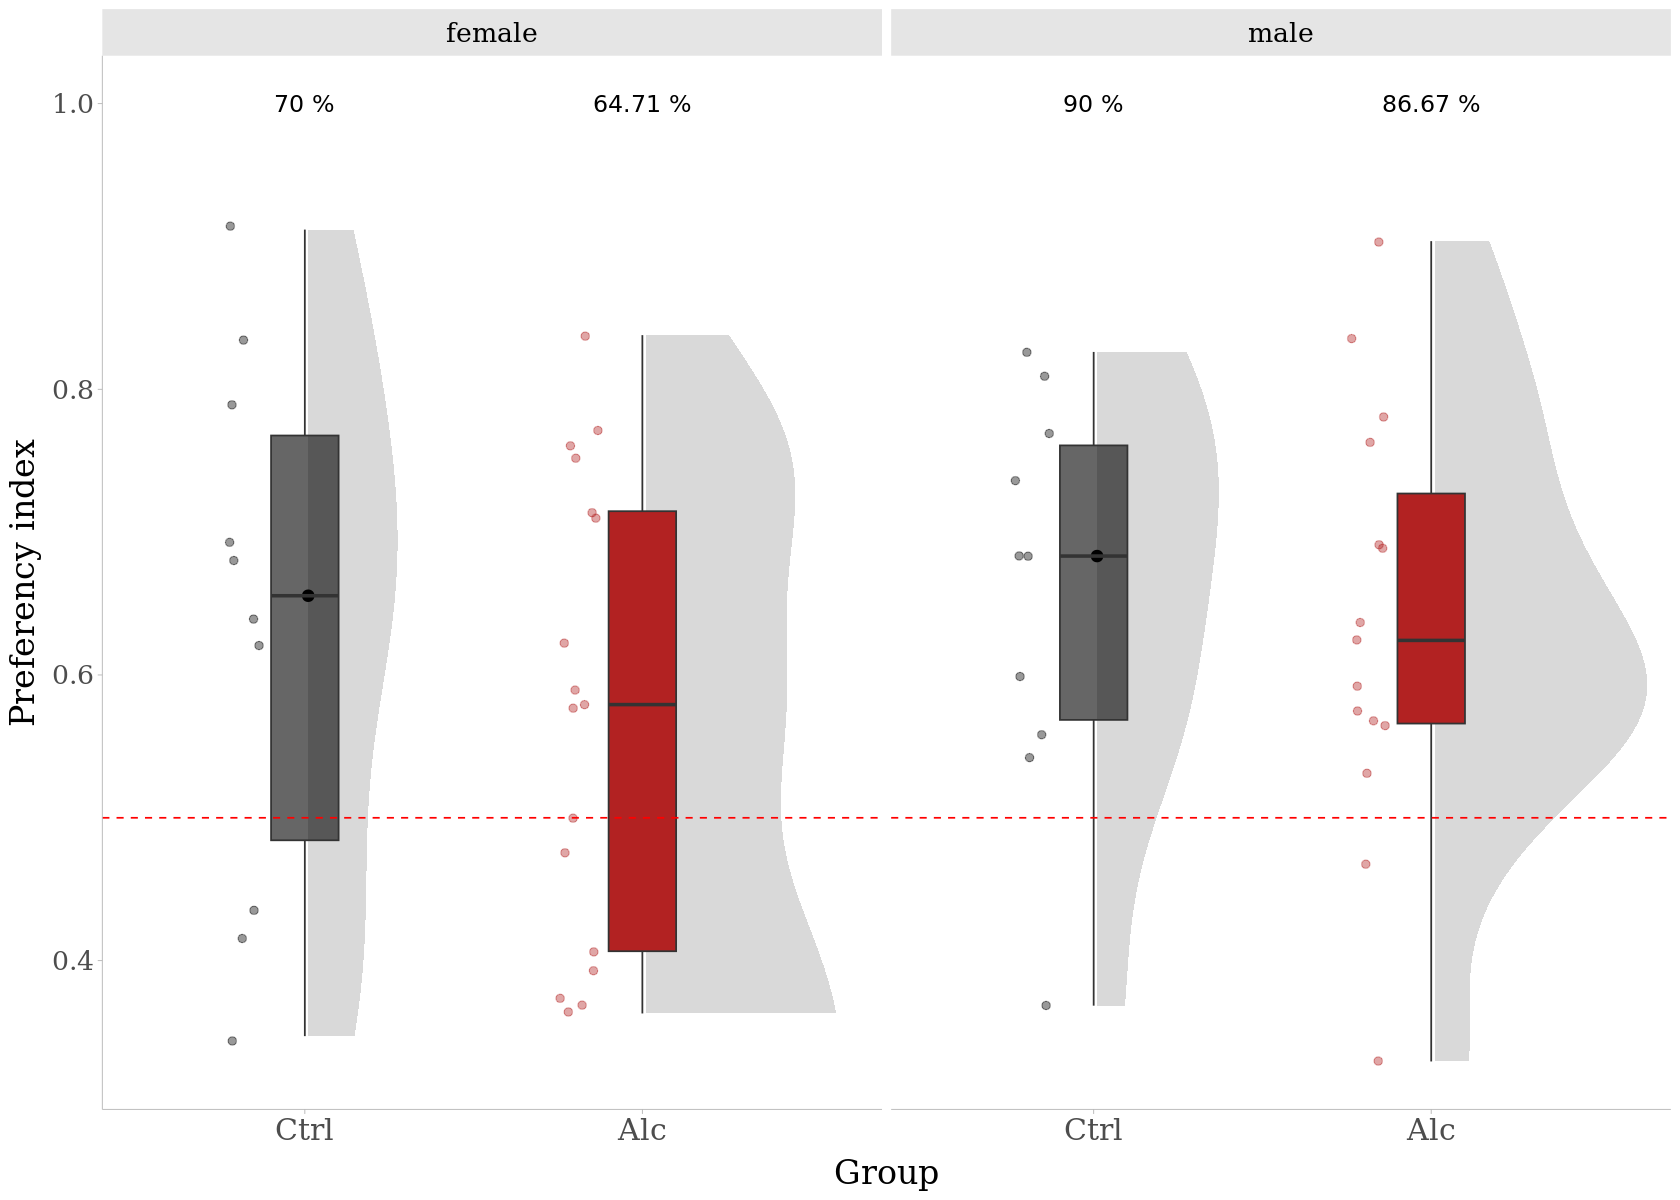

In [250]:
plot_NOR_sex <- NOR_II %>%
  ggplot(aes(x = Group,y = PI, 
             fill = Group)) + facet_grid(. ~ Sex) +
  stat_halfeye(
      adjust = .8, width = .7, fill = "grey85",
      interval_colour = NA, 
      position = position_nudge(x = .01),
      aes(thickness = stat(f*n))) +
  gghalves::geom_half_point(aes(color = Group),
                            side = "l", 
                            range_scale = .3, 
                            alpha = .4, size = 2) +
  geom_boxplot(width = .2) + 
  #stat_pvalue_manual(NOR_novel.pwcC,
  #                   tip.length = 0.03, hide.ns = FALSE) +
  #labs(subtitle = get_test_label(NOR_novel.pwcC, 
  #                               detailed = TRUE)) +
  #stat_compare_means(aes(label = after_stat(p.signif)), 
  #                method = "t.test", ref.group = "Ctrl", hide.ns = TRUE) +
  ylab("Preferency index") +
  scale_color_manual(values = pal_group) +
  scale_fill_manual(values = pal_group) + 
  theme_ggdist() +
  theme(text = element_text(size = 18), legend.position = "none",
        plot.subtitle = element_text(hjust = 1)) + 
  geom_hline(yintercept=0.5, linetype="dashed", color = "red") + 
  theme_settings + 
  geom_text(data = data.frame(Group = c(NOR.Perc_Group_sex$Group[1],NOR.Perc_Group_sex$Group[2]),
                              Sex = c(NOR.Perc_Group_sex$Sex[1],NOR.Perc_Group_sex$Sex[2]), 
                              label = c(paste0(round(NOR.Perc_Group_sex$proportion[1],2)," %"),
                                        paste0(round(NOR.Perc_Group_sex$proportion[2],2)," %"))), 
            aes(x = 1, y = 1, label = label), size = 5) + 
  geom_text(data = data.frame(Group = c(NOR.Perc_Group_sex$Group[3],NOR.Perc_Group_sex$Group[4]),
                              Sex = c(NOR.Perc_Group_sex$Sex[3],NOR.Perc_Group_sex$Sex[4]), 
                              label = c(paste0(round(NOR.Perc_Group_sex$proportion[3],2)," %"),
                                        paste0(round(NOR.Perc_Group_sex$proportion[4],2)," %"))), 
            aes(x = 2, y = 1, label = label), size = 5)
plot_NOR_sex

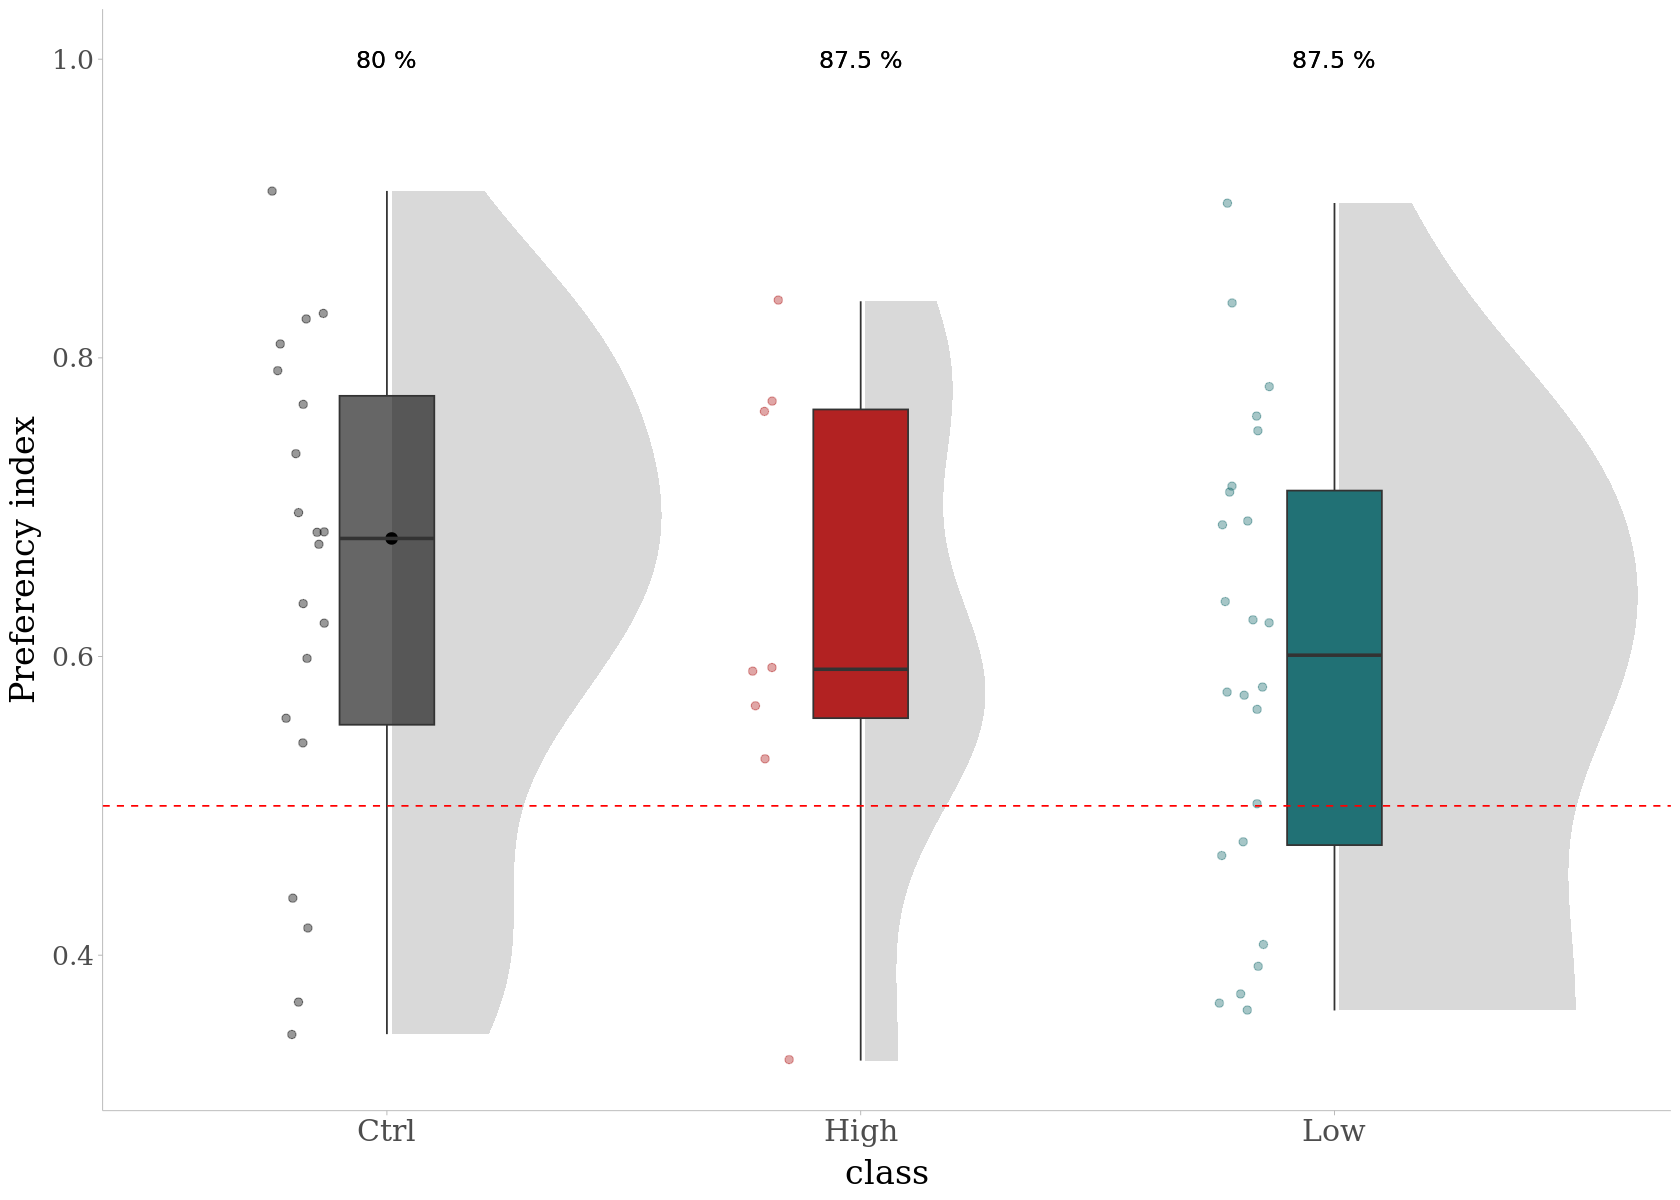

In [251]:
plot_NORClass <- NOR_II %>%
  ggplot(aes(x = class,y = PI, 
             fill = class)) +
  stat_halfeye(
      adjust = .8, width = .7, fill = "grey85",
      interval_colour = NA, 
      position = position_nudge(x = .01),
      aes(thickness = stat(f*n))) +
  gghalves::geom_half_point(aes(color = class),
                            side = "l", 
                            range_scale = .3, 
                            alpha = .4, size = 2) +
  geom_boxplot(width = .2) +
  stat_compare_means(aes(label = after_stat(p.signif)), 
                  method = "t.test", ref.group = "Ctrl", hide.ns = TRUE) + 
  #stat_pvalue_manual(NOR_novel.pwcC,
  #                   tip.length = 0.03, hide.ns = FALSE) +
  #labs(subtitle = get_test_label(NOR_novel.pwcC_class, 
  #                               detailed = TRUE)) +
  ylab("Preferency index") +
  scale_color_manual(values = pal_group) +
  scale_fill_manual(values = pal_group) + 
  theme_ggdist() +
  theme(text = element_text(size = 18), legend.position = "none",
        plot.subtitle = element_text(hjust = 1)) + 
  geom_hline(yintercept=0.5, linetype="dashed", color = "red") +
  theme_settings + 
  geom_text(data = data.frame(class = c(NOR.Perc_class$class[1],NOR.Perc_class$class[1]),
                                        label = c(paste0(round(NOR.Perc_class$proportion[1],2)," %"))), 
            aes(x = 1, y = 1, label = label), size = 5) + 
  geom_text(data = data.frame(class = c(NOR.Perc_class$class[2],NOR.Perc_class$class[2]),
                                        label = c(paste0(round(NOR.Perc_class$proportion[2],2)," %"))), 
            aes(x = 2, y = 1, label = label), size = 5) + 
  geom_text(data = data.frame(class = c(NOR.Perc_class$class[2],NOR.Perc_class$class[2]),
                                        label = c(paste0(round(NOR.Perc_class$proportion[2],2)," %"))), 
            aes(x = 3, y = 1, label = label), size = 5)
plot_NORClass

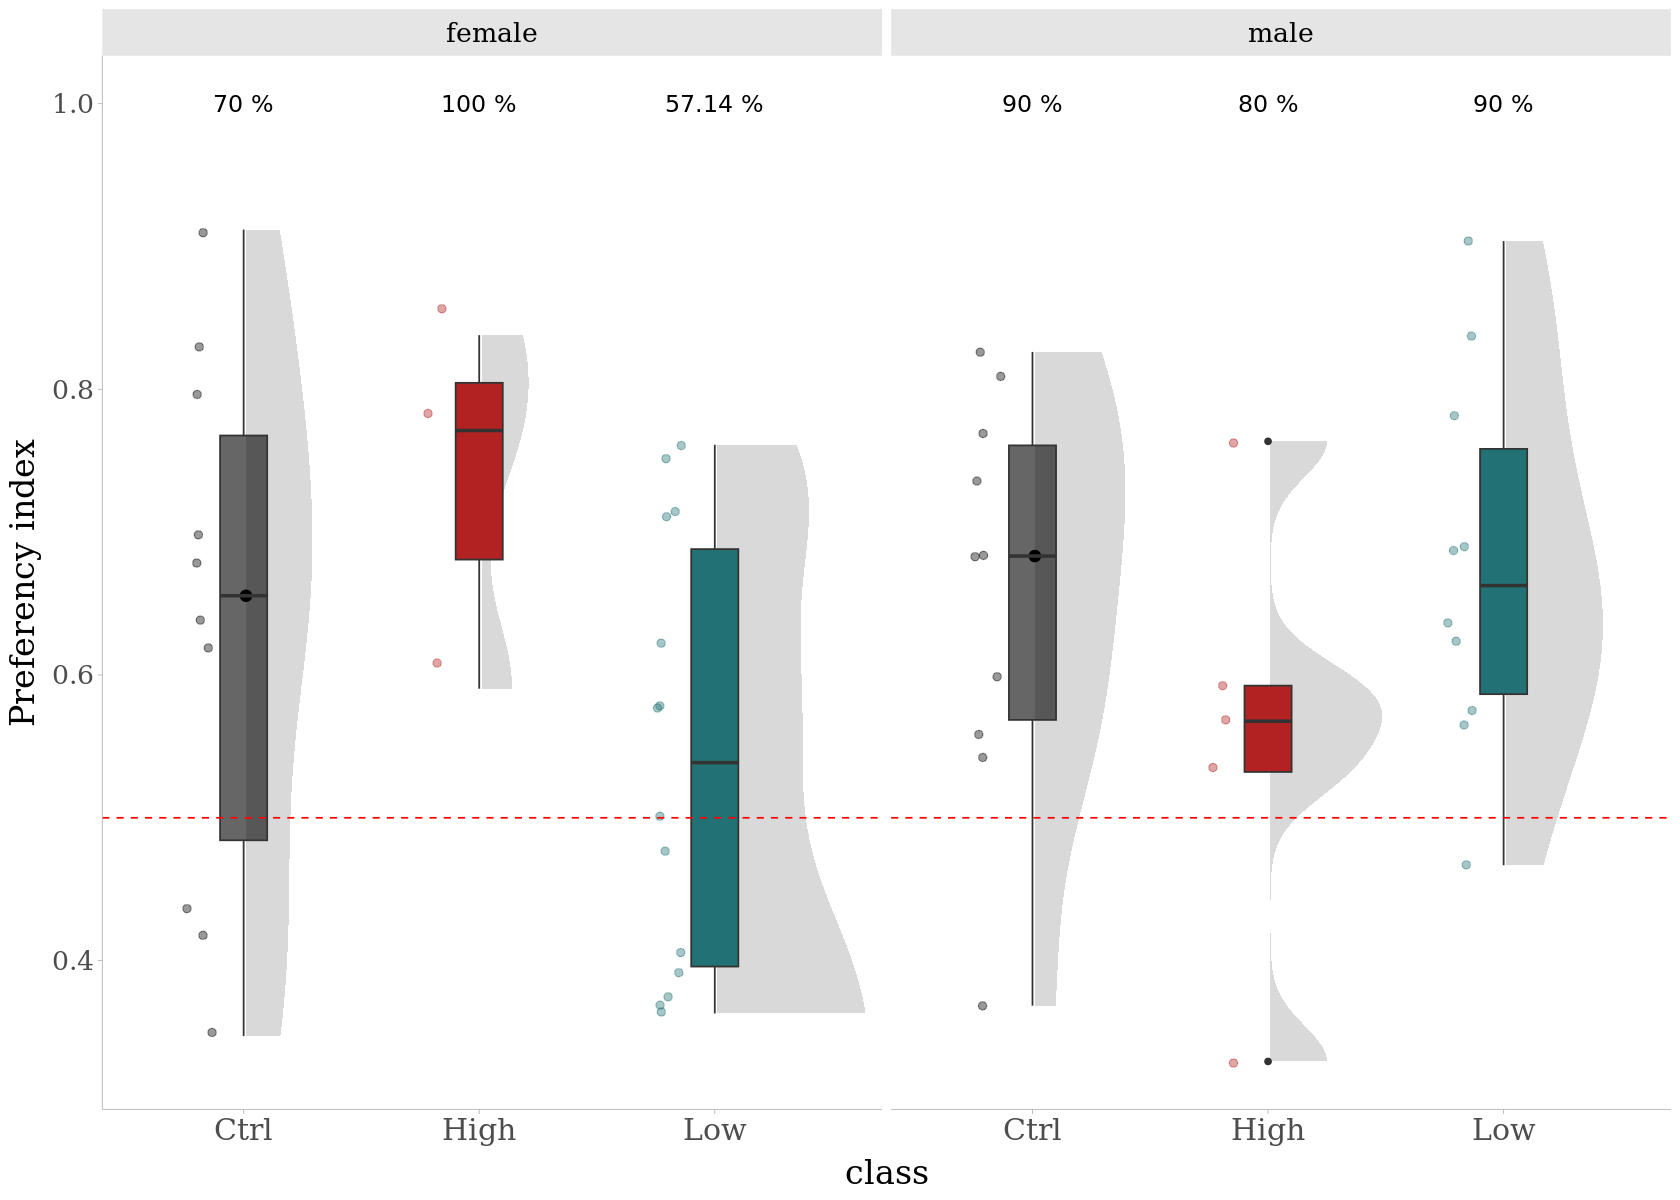

In [254]:
plot_NORClass_sex <- NOR_II %>%
  ggplot(aes(x = class,y = PI, 
             fill = class)) + facet_grid(. ~ Sex) +
  stat_halfeye(
      adjust = .8, width = .7, fill = "grey85",
      interval_colour = NA, 
      position = position_nudge(x = .01),
      aes(thickness = stat(f*n))) +
  gghalves::geom_half_point(aes(color = class),
                            side = "l", 
                            range_scale = .3, 
                            alpha = .4, size = 2) +
  geom_boxplot(width = .2) +
  stat_compare_means(aes(label = after_stat(p.signif)), 
                  method = "t.test", ref.group = "Ctrl", hide.ns = TRUE) + 
  #stat_pvalue_manual(NOR_novel.pwcC,
  #                   tip.length = 0.03, hide.ns = FALSE) +
  #labs(subtitle = get_test_label(NOR_novel.pwcC_class, 
  #                               detailed = TRUE)) +
  ylab("Preferency index") +
  scale_color_manual(values = pal_group) +
  scale_fill_manual(values = pal_group) + 
  theme_ggdist() +
  theme(text = element_text(size = 18), legend.position = "none",
        plot.subtitle = element_text(hjust = 1)) + 
  geom_hline(yintercept=0.5, linetype="dashed", color = "red") +
  theme_settings + 
  geom_text(data = data.frame(class = c(NOR.Perc_class_sex$class[1],NOR.Perc_class_sex$class[2]),
                                        Sex = c(NOR.Perc_class_sex$Sex[1],NOR.Perc_class_sex$Sex[2]), 
                                        label = c(paste0(round(NOR.Perc_class_sex$proportion[1],2)," %"),
                                                  paste0(round(NOR.Perc_class_sex$proportion[2],2)," %"))), 
            aes(x = 1, y = 1, label = label), size = 5) + 
  geom_text(data = data.frame(class = c(NOR.Perc_class_sex$class[3],NOR.Perc_class_sex$class[4]),
                                        Sex = c(NOR.Perc_class_sex$Sex[3],NOR.Perc_class_sex$Sex[4]), 
                                        label = c(paste0(round(NOR.Perc_class_sex$proportion[3],2)," %"),
                                                  paste0(round(NOR.Perc_class_sex$proportion[4],2)," %"))), 
            aes(x = 2, y = 1, label = label), size = 5) + 
  geom_text(data = data.frame(class = c(NOR.Perc_class_sex$class[5],NOR.Perc_class_sex$class[6]),
                                        Sex = c(NOR.Perc_class_sex$Sex[5],NOR.Perc_class_sex$Sex[6]), 
                                        label = c(paste0(round(NOR.Perc_class_sex$proportion[5],2)," %"),
                                                  paste0(round(NOR.Perc_class_sex$proportion[6],2)," %"))), 
            aes(x = 3, y = 1, label = label), size = 5) 
plot_NORClass_sex

## **6. Export data**

In [364]:
dir.create("Figures/NOR")

In [365]:
ggsave(plot = plot_NOR, dpi=300,height = 8, width = 12,bg="white",
       filename = "Figures/NOR/plot_NOR.png")

ggsave(plot = plot_NORClass, dpi=300,height = 8, width = 12,bg="white",
       filename = "Figures/NOR/plot_NOR_class.png")

ggsave(plot = plot_NOR_sex, dpi=300,height = 8, width = 12,bg="white",
       filename = "Figures/NOR/plot_NOR_sex.png")

ggsave(plot = plot_NORClass_sex, dpi=300,height = 8, width = 12,bg="white",
       filename = "Figures/NOR/plot_NOR_class_sex.png")

In [366]:
save(NOR_Report_DLC,NOR_timeObj,NOR_entries,NOR_II,plot_NOR,plot_NOR_sex,plot_NORClass_sex, file = paste0(getwd(),"/Data/Behavior_metricsNOR.RData"))

---
# **Conditionated place preference**
---

## **2. Data preparation**

Reading files and set it all up.

In [302]:
read_excel_allsheets <- function(filename, tibble = FALSE) {
    sheets <- readxl::excel_sheets(filename)
    x <- lapply(sheets, function(X) readxl::read_excel(filename, sheet = X))
    if(!tibble) x <- lapply(x, as.data.frame)
    names(x) <- sheets
    x
}

In [303]:
CPP_input_folder <- paste0(getwd(),"/Data/Behavior/CPP/")
RID_group <- read_csv("Data/RID.csv")
Class_group <- read_csv("Data/RID_Group_class.csv")
CPP_files <- read_excel_allsheets(paste0(CPP_input_folder,"CPP.xlsx")) %>% reduce(rbind) %>% mutate(RID = case_when(as.numeric(RID) < 10 ~ paste0("sub-00",RID), 
                                  as.numeric(RID) > 10 ~ paste0("sub-0",RID)) ) %>% left_join(Class_group, by = c("RID","Batch")) %>% rename("class" = "Intake", "Group" = "Group.x")

Rows: 135 Columns: 4
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (4): RID, Group, Batch, Sex

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 135 Columns: 5
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (5): RID, Group, Batch, Sex, Intake

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## **3. Analysis**

In [304]:
CPP <- CPP_files %>% subset(select = -c(Time_min,Group.y)) %>%
          filter(Group == "Alc" | Group == "Ctrl") %>% 
          mutate(Group = factor(Group, levels = c("Ctrl", "Alc")),
          RID = factor(RID),
          Stage = factor(Stage),
          Place = factor(Place),
          Sex = factor(Sex)) %>% na.omit() %>%
          pivot_wider(names_from = Place, values_from = Time_seg) %>%
          mutate(White = as.numeric(White), Dark = as.numeric(Dark),
                 resta = (White-Dark),
                 suma = (White+Dark),
                 PI = if_else(is.nan(White/suma),0,(White/suma))) %>% na.omit() %>% convert_as_factor(class,Batch)

In [343]:
CPP_PI <- CPP %>% 
          filter(Time == "Test") 

In [344]:
CPP_PI

Group,RID,Stage,Time,Batch,Sex,class,Dark,White,resta,suma,PI
<fct>,<fct>,<fct>,<chr>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Ctrl,sub-003,T1,Test,B1,female,Ctrl,180.91667,192.5500,11.633333,373.4667,0.5155748
Alc,sub-004,T1,Test,B1,female,High,214.18333,216.0500,1.866667,430.2333,0.5021694
Ctrl,sub-005,T1,Test,B1,female,Ctrl,184.45000,215.0000,30.550000,399.4500,0.5382401
Alc,sub-006,T1,Test,B1,female,Low,151.16667,132.2500,-18.916667,283.4167,0.4666275
Alc,sub-007,T1,Test,B1,female,Low,176.83333,222.6500,45.816667,399.4833,0.5573449
Alc,sub-008,T1,Test,B1,female,Low,244.56667,169.4000,-75.166667,413.9667,0.4092117
Alc,sub-009,T1,Test,B1,male,Low,243.40000,141.0000,-102.400000,384.4000,0.3668054
Alc,sub-013,T1,Test,B1,male,High,201.05000,137.0667,-63.983333,338.1167,0.4053828
Alc,sub-014,T1,Test,B1,male,Low,180.08333,193.9167,13.833333,374.0000,0.5184938


## **4. Exploratory data analysis**

In [306]:
CPP_PI %>% skimr::skim()

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,factor.ordered,factor.n_unique,factor.top_counts,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,numeric.hist
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<lgl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,character,Time,0,1,4,4,0,1,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,factor,Group,0,1,NA,NA,NA,NA,NA,FALSE,2,"Alc: 60, Ctr: 39",NA,NA,NA,NA,NA,NA,NA,NA
3,factor,RID,0,1,NA,NA,NA,NA,NA,FALSE,52,"sub: 2, sub: 2, sub: 2, sub: 2",NA,NA,NA,NA,NA,NA,NA,NA
4,factor,Stage,0,1,NA,NA,NA,NA,NA,FALSE,2,"T1: 51, T2: 48",NA,NA,NA,NA,NA,NA,NA,NA
5,factor,Batch,0,1,NA,NA,NA,NA,NA,FALSE,5,"B3: 30, B1: 20, B2: 18, B4: 16",NA,NA,NA,NA,NA,NA,NA,NA
6,factor,Sex,0,1,NA,NA,NA,NA,NA,FALSE,2,"fem: 51, mal: 48",NA,NA,NA,NA,NA,NA,NA,NA
7,factor,class,0,1,NA,NA,NA,NA,NA,FALSE,3,"Low: 46, Ctr: 39, Hig: 14",NA,NA,NA,NA,NA,NA,NA,NA
8,numeric,Dark,0,1,NA,NA,NA,NA,NA,NA,NA,NA,244.851262,161.0161221,58.6500,146.5916667,190.3833333,251.7583333,915.7680000,▇▂▁▁▁
9,numeric,White,0,1,NA,NA,NA,NA,NA,NA,NA,NA,182.034064,84.0260759,0.0000,137.5916667,168.0000000,212.8250000,570.0000000,▂▇▂▁▁


── Data Summary ────────────────────────
                           Values    
Name                       Piped data
Number of rows             99        
Number of columns          12        
_______________________              
Column type frequency:               
  character                1         
  factor                   6         
  numeric                  5         
________________________             
Group variables            None      

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 Time                  0             1   4   4     0        1          0

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique
1 Group                 0             1 FALSE          2
2 RID                   0             1 FALSE         52
3 Stage                 0             1 FALSE          2
4

In [342]:
CPP_extremes <- CPP_PI %>% group_by(Group,Sex) %>% identify_outliers(PI) #%>% filter(is.extreme == TRUE) 
CPP_PI <- CPP_PI %>% anti_join(CPP_extremes)

Joining with `by = join_by(Group, RID, Stage, Time, Batch, Sex, class, Dark, White, resta, suma, PI)`


### **4.1 Stats (hyphotesis testing)**

In [308]:
CPP.shapiro <-CPP_PI %>% 
    shapiro_test(PI)
CPP.shapiro

CPP.levene <-CPP_PI %>% 
    levene_test(PI~Group)
CPP.levene

variable,statistic,p
<chr>,<dbl>,<dbl>
PI,0.9830834,0.2532727


df1,df2,statistic,p
<int>,<int>,<dbl>,<dbl>
1,94,1.974826,0.1632329


In [311]:
CPP_PI.aov <- anova_test(data = CPP_PI, dv = PI, wid = RID,
                               between = c(Group,Sex), within = Stage)
CPP_PI.aov

,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,Group,1,40,0.503,0.482,,9.00e-03
2,Sex,1,40,0.496,0.485,,9.00e-03
3,Stage,1,40,11.128,0.002,*,7.20e-02
4,Group:Sex,1,40,0.002,0.968,,2.99e-05
5,Group:Stage,1,40,1.398,0.244,,1.00e-02
6,Sex:Stage,1,40,1.968,0.168,,1.40e-02
7,Group:Sex:Stage,1,40,1.118,0.297,,8.00e-03


In [312]:
CPP_PI.t <- CPP_PI %>%
  group_by(Group) %>%
  pairwise_t_test(
    PI ~ Stage, paired = FALSE, 
    p.adjust.method = "fdr")
CPP_PI.t

,Group,.y.,group1,group2,n1,n2,p,p.signif,p.adj,p.adj.signif
,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>
1,Ctrl,PI,T1,T2,17,20,0.0593,ns,0.0593,ns
2,Alc,PI,T1,T2,31,28,0.0691,ns,0.0691,ns


In [313]:
CPP_PI.t_sex <- CPP_PI %>%
  group_by(Group,Sex) %>%
  pairwise_t_test(
    PI ~ Stage, paired = FALSE, 
    p.adjust.method = "fdr")
CPP_PI.t_sex

,Group,Sex,.y.,group1,group2,n1,n2,p,p.signif,p.adj,p.adj.signif
,<fct>,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>
1,Ctrl,female,PI,T1,T2,8,10,0.5520,ns,0.5520,ns
2,Ctrl,male,PI,T1,T2,9,10,0.0546,ns,0.0546,ns
3,Alc,female,PI,T1,T2,17,14,0.2910,ns,0.2910,ns
4,Alc,male,PI,T1,T2,14,14,0.0868,ns,0.0868,ns


In [314]:
CPP_PI.t_stage <- CPP_PI %>%
  group_by(class,Sex) %>%
  pairwise_t_test(
    PI ~ Stage, 
    p.adjust.method = "fdr")
CPP_PI.t_stage

,Sex,class,.y.,group1,group2,n1,n2,p,p.signif,p.adj,p.adj.signif
,<fct>,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>
1,female,Ctrl,PI,T1,T2,8,10,0.5520,ns,0.5520,ns
2,male,Ctrl,PI,T1,T2,9,10,0.0546,ns,0.0546,ns
3,female,High,PI,T1,T2,3,2,0.3280,ns,0.3280,ns
4,male,High,PI,T1,T2,4,4,0.1700,ns,0.1700,ns
5,female,Low,PI,T1,T2,14,12,0.4780,ns,0.4780,ns
6,male,Low,PI,T1,T2,10,10,0.2470,ns,0.2470,ns


In [315]:
CPP_PI.t_class <- CPP_PI %>%
  group_by(Stage) %>%
  pairwise_t_test(
    PI ~ class, 
    p.adjust.method = "fdr")
CPP_PI.t_class

,Stage,.y.,group1,group2,n1,n2,p,p.signif,p.adj,p.adj.signif
,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>
1,T1,PI,Ctrl,High,17,7,0.387,ns,0.581,ns
2,T1,PI,Ctrl,Low,17,24,0.350,ns,0.581,ns
3,T1,PI,High,Low,7,24,0.830,ns,0.830,ns
4,T2,PI,Ctrl,High,20,6,0.293,ns,0.440,ns
5,T2,PI,Ctrl,Low,20,22,0.946,ns,0.946,ns
6,T2,PI,High,Low,6,22,0.268,ns,0.440,ns


In [316]:
CPP_PI.t_class_sex <- CPP_PI %>%
  group_by(Stage,Sex) %>%
  pairwise_t_test(
    PI ~ class, 
    p.adjust.method = "fdr")
CPP_PI.t_class_sex

,Stage,Sex,.y.,group1,group2,n1,n2,p,p.signif,p.adj,p.adj.signif
,<fct>,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>
1,T1,female,PI,Ctrl,High,8,3,0.729,ns,0.920,ns
2,T1,female,PI,Ctrl,Low,8,14,0.920,ns,0.920,ns
3,T1,female,PI,High,Low,3,14,0.765,ns,0.920,ns
4,T1,male,PI,Ctrl,High,9,4,0.406,ns,0.609,ns
5,T1,male,PI,Ctrl,Low,9,10,0.215,ns,0.609,ns
6,T1,male,PI,High,Low,4,10,0.896,ns,0.896,ns
7,T2,female,PI,Ctrl,High,10,2,0.221,ns,0.372,ns
8,T2,female,PI,Ctrl,Low,10,12,0.872,ns,0.872,ns
9,T2,female,PI,High,Low,2,12,0.248,ns,0.372,ns


### **4.1 Stats (Linear modelling)**

In [317]:
Model_CPP_PI <- lmer(formula = PI ~ Group*Sex*Stage+Batch+(1|RID), data = CPP_PI)
Model_CPP_PI_Intake <- lmer(formula = PI ~ class*Sex*Stage+Batch+(1|RID), data = CPP_PI)

In [323]:
emmeans_CPP_PI <- emmeans(Model_CPP_PI, specs = pairwise ~ Group*Sex*Stage, adjust="fdr")
emmeans_CPP_PI$contrasts %>% as_tibble() %>% filter(p.value < 0.05) %>% add_significance()

contrast,estimate,SE,df,t.ratio,p.value,p.value.signif
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Ctrl male T1 - Ctrl male T2,-0.1180883,0.03539162,43.215,-3.336618,0.04902266,*


In [ ]:
emmeans_CPP_PI_Intake <- emmeans(Model_CPP_PI_Intake, specs = pairwise ~ class*Sex*Stage, adjust="fdr")
emmeans_CPP_PI_Intake$contrasts %>% as_tibble() %>% filter(p.value < 0.05) %>% add_significance()

contrast,estimate,SE,df,t.ratio,p.value,p.value.signif
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>


In [117]:
Model_CPP_PI_Intake %>% report()

We fitted a linear mixed model (estimated using REML and nloptwrap optimizer)
to predict PI with class, Sex, Stage and Batch (formula: PI ~ class * Sex *
Stage + Batch). The model included RID as random effect (formula: ~1 | RID).
The model's total explanatory power is substantial (conditional R2 = 0.48) and
the part related to the fixed effects alone (marginal R2) is of 0.38. The
model's intercept, corresponding to class = Ctrl, Sex = female, Stage = T1 and
Batch = B1, is at 0.48 (95% CI [0.41, 0.55], t(78) = 13.69, p < .001). Within
this model:

  - The effect of class [High] is statistically non-significant and positive
(beta = 0.02, 95% CI [-0.09, 0.14], t(78) = 0.42, p = 0.672; Std. beta = 0.24,
95% CI [-0.89, 1.38])
  - The effect of class [Low] is statistically non-significant and positive (beta
= 4.64e-03, 95% CI [-0.07, 0.08], t(78) = 0.12, p = 0.902; Std. beta = 0.05,
95% CI [-0.69, 0.78])
  - The effect of Sex [male] is statistically non-significant and negative (beta
= -0.02, 95% CI [-0.10, 0.06], t(78) = -0.49, p = 0.625; Std. beta = -0.20, 95%
CI [-1.01, 0.61])
  - The effect of Stage [T2] is statistically non-significant and positive (beta
= 0.04, 95% CI [-0.03, 0.11], t(78) = 1.08, p = 0.285; Std. beta = 0.39, 95% CI
[-0.33, 1.12])
  - The effect of Batch [B2] is statistically non-significant and negative (beta
= -0.04, 95% CI [-0.10, 0.02], t(78) = -1.44, p = 0.153; Std. beta = -0.42, 95%
CI [-1.00, 0.16])
  - The effect of Batch [B3] is statistically non-significant and negative (beta
= -4.30e-03, 95% CI [-0.06, 0.05], t(78) = -0.16, p = 0.874; Std. beta = -0.04,
95% CI [-0.57, 0.48])
  - The effect of Batch [B4] is statistically significant and negative (beta =
-0.11, 95% CI [-0.17, -0.04], t(78) = -3.26, p = 0.002; Std. beta = -1.05, 95%
CI [-1.69, -0.41])
  - The effect of Batch [B5] is statistically significant and negative (beta =
-0.15, 95% CI [-0.21, -0.09], t(78) = -4.72, p < .001; Std. beta = -1.47, 95%
CI [-2.09, -0.85])
  - The effect of class [High] × Sex [male] is statistically non-significant and
positive (beta = 0.03, 95% CI [-0.13, 0.19], t(78) = 0.38, p = 0.708; Std. beta
= 0.29, 95% CI [-1.23, 1.81])
  - The effect of class [Low] × Sex [male] is statistically non-significant and
positive (beta = 0.03, 95% CI [-0.08, 0.13], t(78) = 0.48, p = 0.629; Std. beta
= 0.26, 95% CI [-0.80, 1.32])
  - The effect of class [High] × Stage [T2] is statistically non-significant and
positive (beta = 0.08, 95% CI [-0.09, 0.24], t(78) = 0.93, p = 0.353; Std. beta
= 0.74, 95% CI [-0.84, 2.32])
  - The effect of class [Low] × Stage [T2] is statistically non-significant and
negative (beta = -7.97e-03, 95% CI [-0.10, 0.09], t(78) = -0.16, p = 0.870;
Std. beta = -0.08, 95% CI [-1.02, 0.86])
  - The effect of Sex [male] × Stage [T2] is statistically non-significant and
positive (beta = 0.08, 95% CI [-0.03, 0.18], t(78) = 1.50, p = 0.138; Std. beta
= 0.76, 95% CI [-0.25, 1.77])
  - The effect of (class [High] × Sex [male]) × Stage [T2] is statistically
non-significant and negative (beta = -0.12, 95% CI [-0.33, 0.09], t(78) =
-1.18, p = 0.243; Std. beta = -1.21, 95% CI [-3.25, 0.84])
  - The effect of (class [Low] × Sex [male]) × Stage [T2] is statistically
non-significant and negative (beta = -0.07, 95% CI [-0.21, 0.07], t(78) =
-1.03, p = 0.306; Std. beta = -0.70, 95% CI [-2.05, 0.65])

Standardized parameters were obtained by fitting the model on a standardized
version of the dataset. 95% Confidence Intervals (CIs) and p-values were
computed using a Wald t-distribution approximation.

## **5. Visualization**

In [349]:
CPP.Perc_Group <- CPP_PI %>% group_by(Group,Stage) %>% 
              summarise(proportion = (sum(PI > 0.5,na.rm = T)/(sum(PI < 0.5,na.rm = T) + sum(PI > 0.5,na.rm = T))) * 100 )
CPP.Perc_class <- CPP_PI %>% group_by(class,Stage) %>% 
              summarise(proportion = (sum(PI > 0.5,na.rm = T)/(sum(PI < 0.5,na.rm = T) + sum(PI > 0.5,na.rm = T))) * 100 )
CPP.Perc_Group_sex <- CPP_PI %>%
          filter(Stage == "T2") %>% group_by(Group,Sex) %>% 
              summarise(proportion = (sum(PI > 0.5,na.rm = T)/(sum(PI < 0.5,na.rm = T) + sum(PI > 0.5,na.rm = T))) * 100 )
CPP.Perc_class_sex <- CPP_PI %>%
          filter(Stage == "T2") %>% group_by(class,Sex) %>% 
              summarise(proportion = (sum(PI > 0.5,na.rm = T)/(sum(PI < 0.5,na.rm = T) + sum(PI > 0.5,na.rm = T))) * 100 )


`summarise()` has grouped output by 'Group'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'class'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'Group'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'class'. You can override using the `.groups` argument.


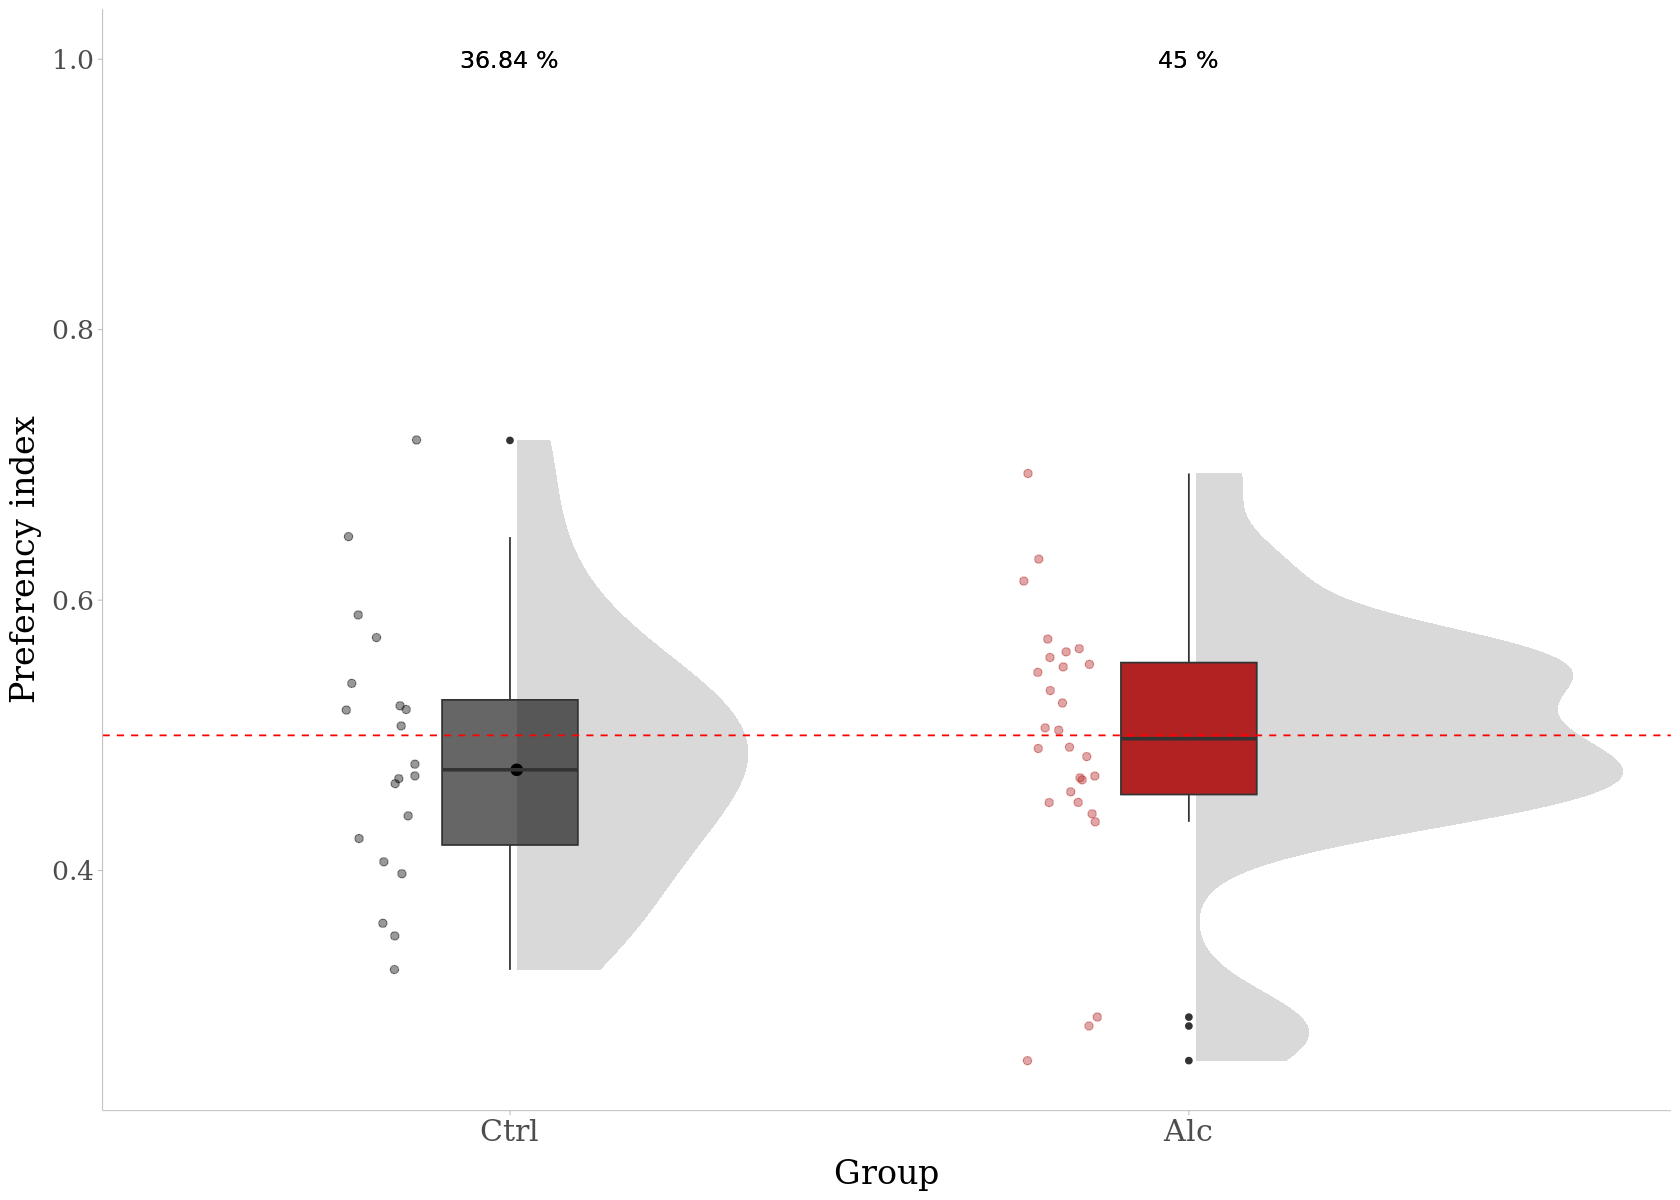

In [350]:
plot_CPP <- CPP_PI %>%
          filter(Stage == "T2")%>%
  ggplot(aes(x = Group,y = PI, 
             fill = Group)) + 
  stat_halfeye(
      adjust = .8, width = .7, fill = "grey85",
      interval_colour = NA, 
      position = position_nudge(x = .01),
      aes(thickness = stat(f*n))) +
  gghalves::geom_half_point(aes(color = Group),
                            side = "l", 
                            range_scale = .3, 
                            alpha = .4, size = 2) +
  geom_boxplot(width = .2) + 
  #stat_pvalue_manual(NOR_novel.pwcC,
  #                   tip.length = 0.03, hide.ns = FALSE) +
  #labs(subtitle = get_test_label(NOR_novel.pwcC, 
  #                               detailed = TRUE)) +
  #stat_compare_means(aes(label = after_stat(p.signif)), 
  #                method = "t.test", ref.group = "Ctrl", hide.ns = TRUE) +
  ylab("Preferency index") +
  scale_color_manual(values = pal_group) +
  scale_fill_manual(values = pal_group) + 
  theme_ggdist() +
  theme(text = element_text(size = 18), legend.position = "none",
        plot.subtitle = element_text(hjust = 1)) + 
  geom_hline(yintercept=0.5, linetype="dashed", color = "red") + 
  theme_settings +
  geom_text(data = data.frame(Group = c(CPP.Perc_Group$Group[1],CPP.Perc_Group$Group[1]),
                                        label = c(paste0(round(CPP.Perc_Group$proportion[1],2)," %"))), 
            aes(x = 1, y = 1, label = label), size = 5) + 
  geom_text(data = data.frame(Group = c(CPP.Perc_Group$Group[2],CPP.Perc_Group$Group[2]),
                                        label = c(paste0(round(CPP.Perc_Group$proportion[2],2)," %"))), 
            aes(x = 2, y = 1, label = label), size = 5)
plot_CPP

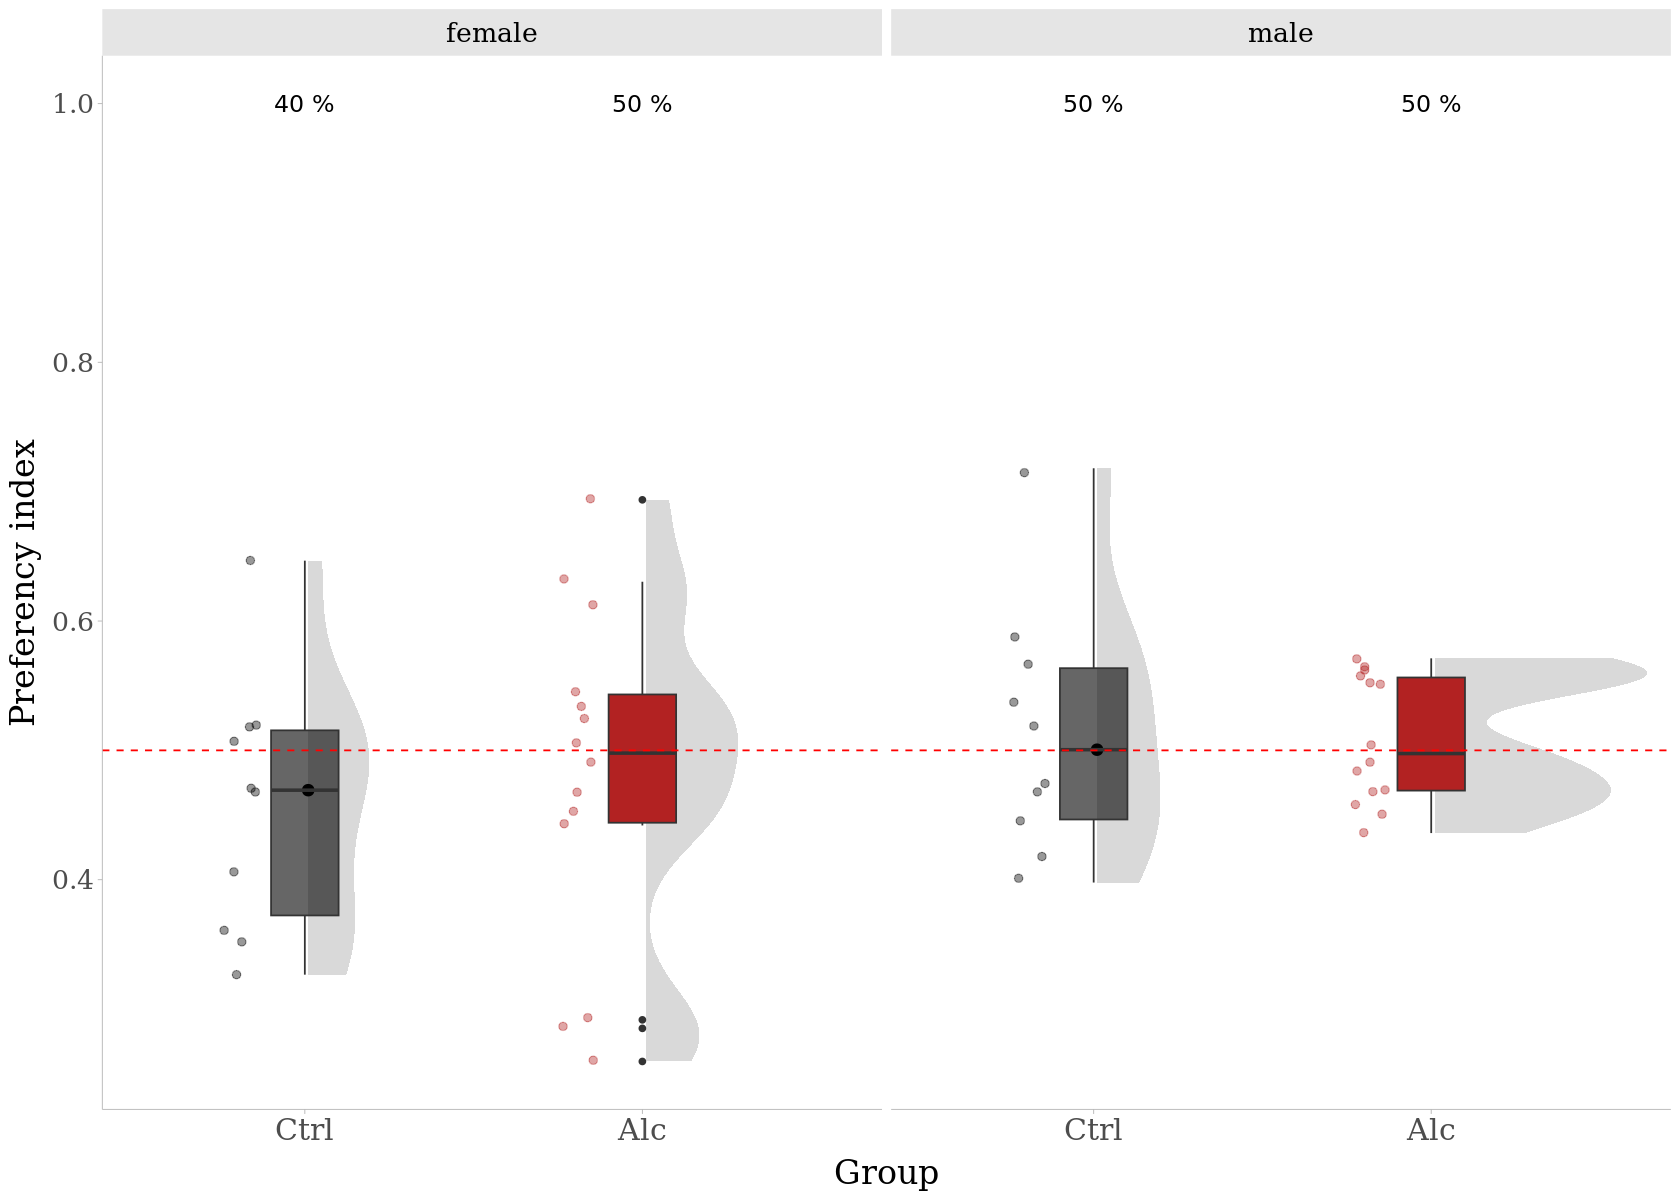

In [351]:
plot_CPP_sex <- CPP_PI %>%
          filter(Stage == "T2") %>%
  ggplot(aes(x = Group,y = PI, 
             fill = Group)) + facet_grid(. ~ Sex) +
  stat_halfeye(
      adjust = .8, width = .7, fill = "grey85",
      interval_colour = NA, 
      position = position_nudge(x = .01),
      aes(thickness = stat(f*n))) +
  gghalves::geom_half_point(aes(color = Group),
                            side = "l", 
                            range_scale = .3, 
                            alpha = .4, size = 2) +
  geom_boxplot(width = .2) + 
  #stat_pvalue_manual(NOR_novel.pwcC,
  #                   tip.length = 0.03, hide.ns = FALSE) +
  #labs(subtitle = get_test_label(NOR_novel.pwcC, 
  #                               detailed = TRUE)) +
  #stat_compare_means(aes(label = after_stat(p.signif)), 
  #                method = "t.test", ref.group = "Ctrl", hide.ns = TRUE) +
  ylab("Preferency index") +
  scale_color_manual(values = pal_group) +
  scale_fill_manual(values = pal_group) + 
  theme_ggdist() +
  theme(text = element_text(size = 18), legend.position = "none",
        plot.subtitle = element_text(hjust = 1)) + 
  geom_hline(yintercept=0.5, linetype="dashed", color = "red") + 
  theme_settings + 
  geom_text(data = data.frame(Group = c(CPP.Perc_Group_sex$Group[1],CPP.Perc_Group_sex$Group[2]),
                              Sex = c(CPP.Perc_Group_sex$Sex[1],CPP.Perc_Group_sex$Sex[2]), 
                              label = c(paste0(round(CPP.Perc_Group_sex$proportion[1],2)," %"),
                                        paste0(round(CPP.Perc_Group_sex$proportion[2],2)," %"))), 
            aes(x = 1, y = 1, label = label), size = 5) + 
  geom_text(data = data.frame(Group = c(CPP.Perc_Group_sex$Group[3],CPP.Perc_Group_sex$Group[4]),
                              Sex = c(CPP.Perc_Group_sex$Sex[3],CPP.Perc_Group_sex$Sex[4]), 
                              label = c(paste0(round(CPP.Perc_Group_sex$proportion[3],2)," %"),
                                        paste0(round(CPP.Perc_Group_sex$proportion[4],2)," %"))), 
            aes(x = 2, y = 1, label = label), size = 5)
plot_CPP_sex

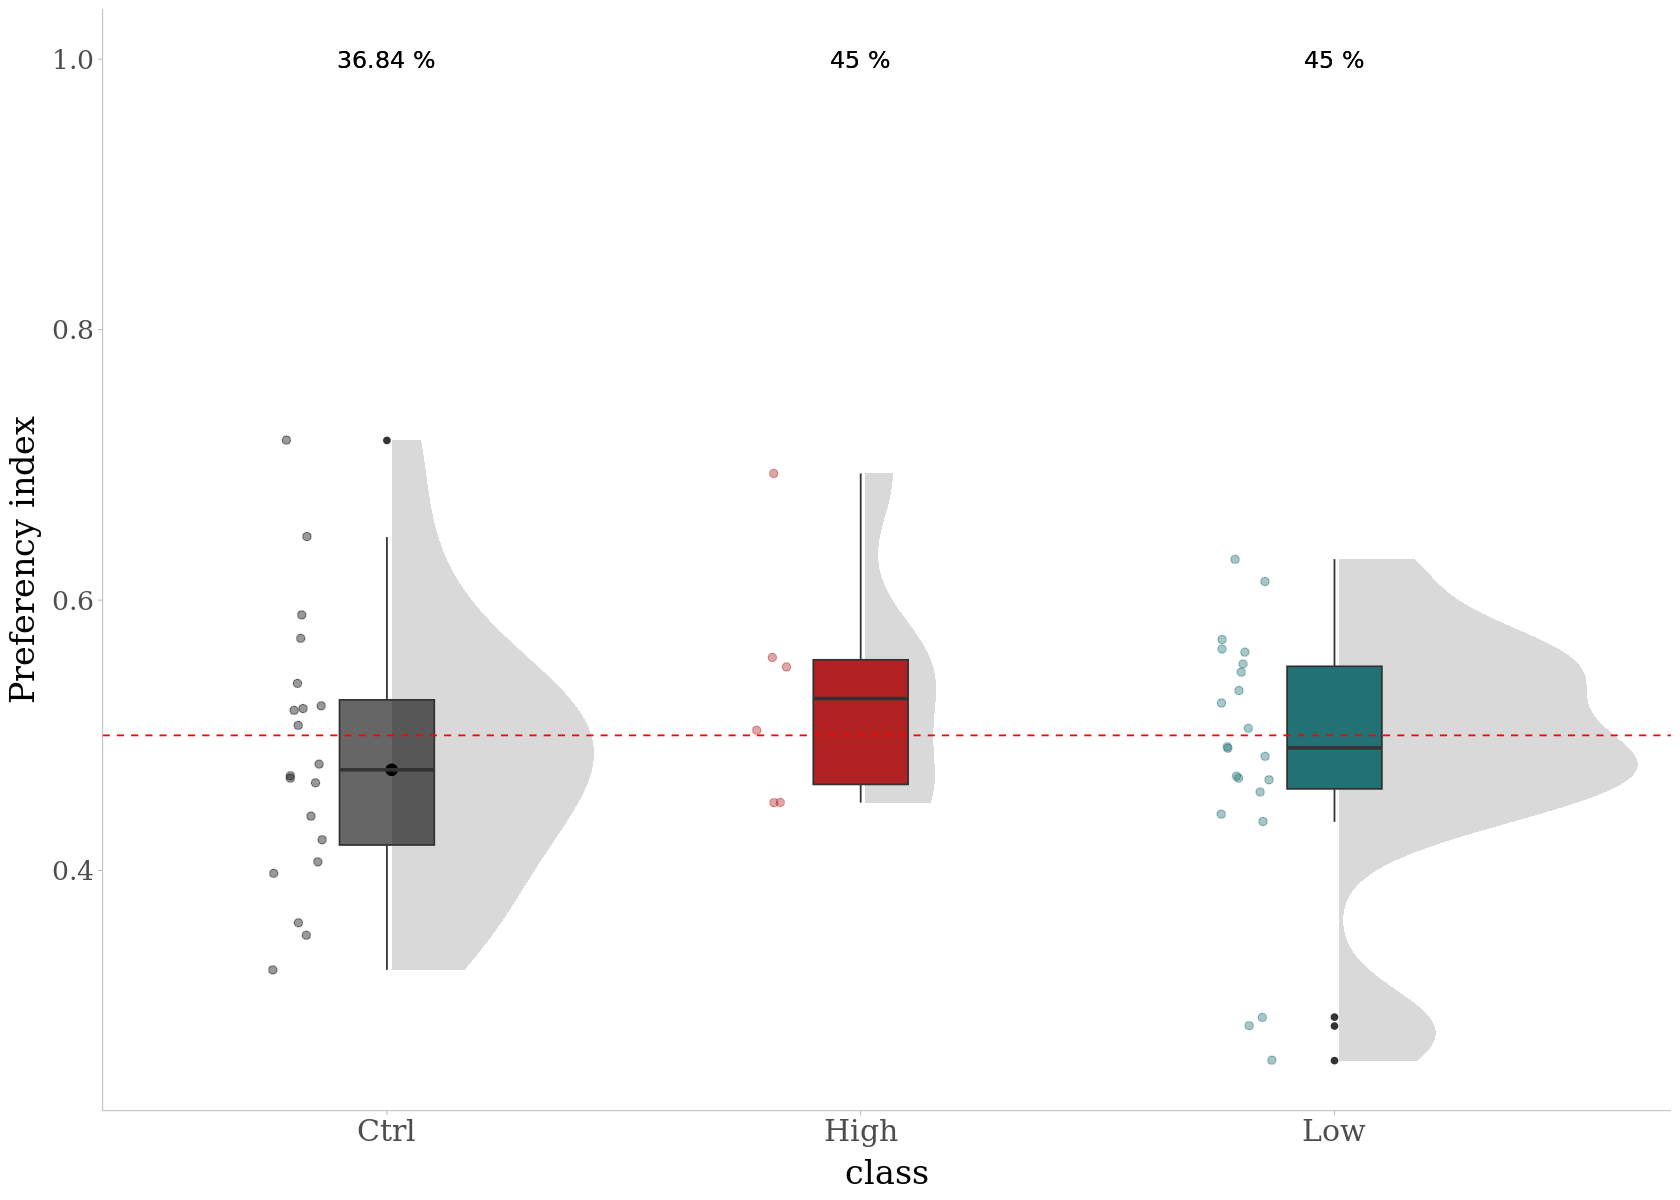

In [352]:
plot_CPP_intake <- CPP_PI %>%
          filter(Stage == "T2") %>%
  ggplot(aes(x = class,y = PI, 
             fill = class)) +
  stat_halfeye(
      adjust = .8, width = .7, fill = "grey85",
      interval_colour = NA, 
      position = position_nudge(x = .01),
      aes(thickness = stat(f*n))) +
  gghalves::geom_half_point(aes(color = class),
                            side = "l", 
                            range_scale = .3, 
                            alpha = .4, size = 2) +
  geom_boxplot(width = .2) +
  stat_compare_means(aes(label = after_stat(p.signif)), 
                  method = "t.test", ref.group = "Ctrl", hide.ns = TRUE) + 
  #stat_pvalue_manual(NOR_novel.pwcC,
  #                   tip.length = 0.03, hide.ns = FALSE) +
  #labs(subtitle = get_test_label(NOR_novel.pwcC_class, 
  #                               detailed = TRUE)) +
  ylab("Preferency index") +
  scale_color_manual(values = pal_group) +
  scale_fill_manual(values = pal_group) + 
  theme_ggdist() +
  theme(text = element_text(size = 18), legend.position = "none",
        plot.subtitle = element_text(hjust = 1)) + 
  geom_hline(yintercept=0.5, linetype="dashed", color = "red") +
  theme_settings + 
  geom_text(data = data.frame(class = c(CPP.Perc_class$class[1],CPP.Perc_class$class[1]),
                                        label = c(paste0(round(CPP.Perc_class$proportion[1],2)," %"))), 
            aes(x = 1, y = 1, label = label), size = 5) + 
  geom_text(data = data.frame(class = c(CPP.Perc_class$class[2],CPP.Perc_class$class[2]),
                                        label = c(paste0(round(CPP.Perc_class$proportion[2],2)," %"))), 
            aes(x = 2, y = 1, label = label), size = 5) + 
  geom_text(data = data.frame(class = c(CPP.Perc_class$class[2],CPP.Perc_class$class[2]),
                                        label = c(paste0(round(CPP.Perc_class$proportion[2],2)," %"))), 
            aes(x = 3, y = 1, label = label), size = 5)
plot_CPP_intake

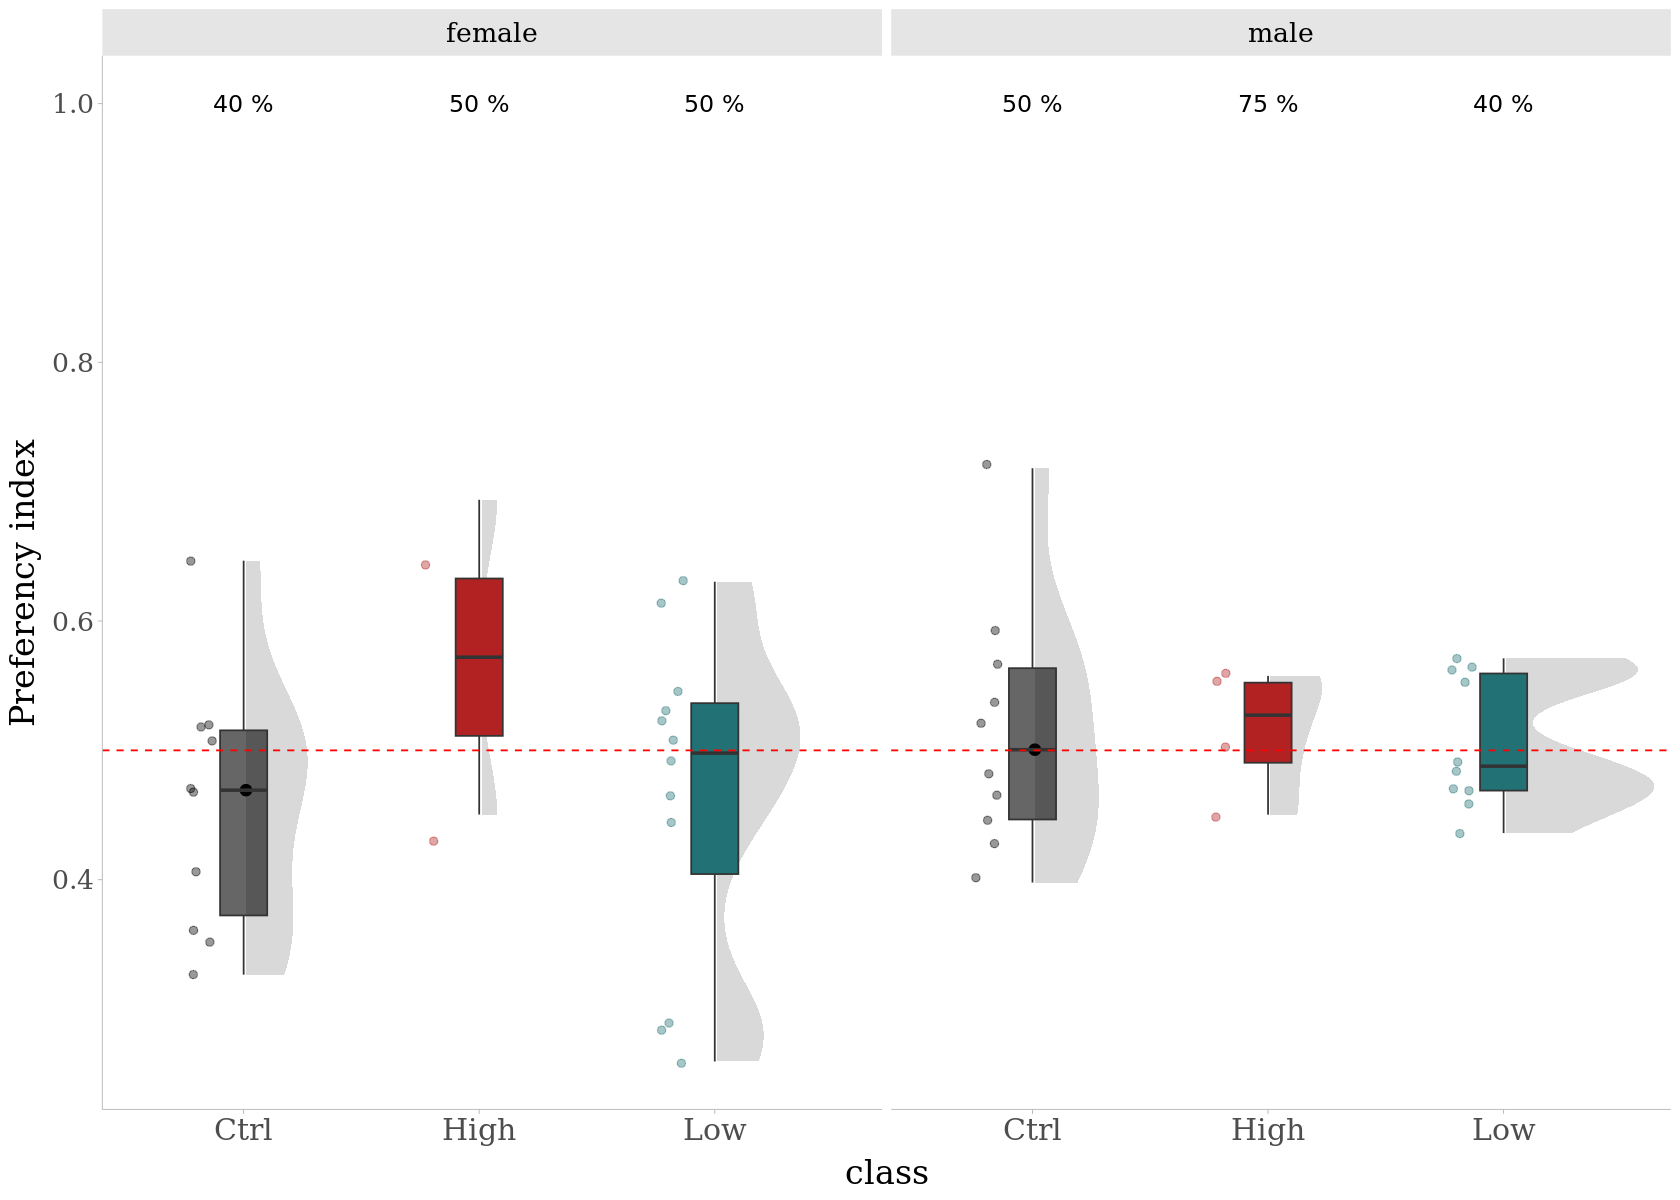

In [354]:
plot_CPP_intake_sex <- CPP_PI %>%
          filter(Stage == "T2") %>%
  ggplot(aes(x = class,y = PI, 
             fill = class)) + facet_grid(. ~ Sex) +
  stat_halfeye(
      adjust = .8, width = .7, fill = "grey85",
      interval_colour = NA, 
      position = position_nudge(x = .01),
      aes(thickness = stat(f*n))) +
  gghalves::geom_half_point(aes(color = class),
                            side = "l", 
                            range_scale = .3, 
                            alpha = .4, size = 2) +
  geom_boxplot(width = .2) +
  stat_compare_means(aes(label = after_stat(p.signif)), 
                  method = "t.test", ref.group = "Ctrl", hide.ns = TRUE) + 
  #stat_pvalue_manual(NOR_novel.pwcC,
  #                   tip.length = 0.03, hide.ns = FALSE) +
  #labs(subtitle = get_test_label(NOR_novel.pwcC_class, 
  #                               detailed = TRUE)) +
  ylab("Preferency index") +
  scale_color_manual(values = pal_group) +
  scale_fill_manual(values = pal_group) + 
  theme_ggdist() +
  theme(text = element_text(size = 18), legend.position = "none",
        plot.subtitle = element_text(hjust = 1)) + 
  geom_hline(yintercept=0.5, linetype="dashed", color = "red") +
  theme_settings + 
  geom_text(data = data.frame(class = c(CPP.Perc_class_sex$class[1],CPP.Perc_class_sex$class[2]),
                                        Sex = c(CPP.Perc_class_sex$Sex[1],CPP.Perc_class_sex$Sex[2]), 
                                        label = c(paste0(round(CPP.Perc_class_sex$proportion[1],2)," %"),
                                                  paste0(round(CPP.Perc_class_sex$proportion[2],2)," %"))), 
            aes(x = 1, y = 1, label = label), size = 5) + 
  geom_text(data = data.frame(class = c(CPP.Perc_class_sex$class[3],CPP.Perc_class_sex$class[4]),
                                        Sex = c(CPP.Perc_class_sex$Sex[3],CPP.Perc_class_sex$Sex[4]), 
                                        label = c(paste0(round(CPP.Perc_class_sex$proportion[3],2)," %"),
                                                  paste0(round(CPP.Perc_class_sex$proportion[4],2)," %"))), 
            aes(x = 2, y = 1, label = label), size = 5) + 
  geom_text(data = data.frame(class = c(CPP.Perc_class_sex$class[5],CPP.Perc_class_sex$class[6]),
                                        Sex = c(CPP.Perc_class_sex$Sex[5],CPP.Perc_class_sex$Sex[6]), 
                                        label = c(paste0(round(CPP.Perc_class_sex$proportion[5],2)," %"),
                                                  paste0(round(CPP.Perc_class_sex$proportion[6],2)," %"))), 
            aes(x = 3, y = 1, label = label), size = 5) 
plot_CPP_intake_sex

## **6. Export data**

In [355]:
dir.create("Figures/CPP")

In [356]:
ggsave(plot = plot_CPP, dpi=300,height = 8, width = 12,bg="white",
       filename = "Figures/CPP/plot_CPP.png")

ggsave(plot = plot_CPP_intake, dpi=300,height = 8, width = 12,bg="white",
       filename = "Figures/CPP/plot_CPP_class.png")

ggsave(plot = plot_CPP_sex, dpi=300,height = 8, width = 12,bg="white",
       filename = "Figures/CPP/plot_CPP_sex.png")

ggsave(plot = plot_CPP_intake_sex, dpi=300,height = 8, width = 12,bg="white",
       filename = "Figures/CPP/plot_CPP_class_sex.png")

In [357]:
save(CPP,CPP_PI,plot_CPP,plot_CPP_intake,plot_CPP_sex,plot_CPP_intake_sex, file = paste0(getwd(),"/Data/Behavior_metricsCPP.RData"))